<a href="https://colab.research.google.com/github/KorrawanOu/BSC_DPDM23/blob/main/midterm_bscdpdm23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

เตรียมข้อมูลอุตุนิยมวิทยา (https://drive.google.com/drive/folders/1k6tJcTTv2bKmFz6A5oOWi-sAeTVIQpG4?usp=sharing)

ให้เตรียมข้อมูลลักษณะอากาศของแต่ละวัน (แก้ missing, noise, ฯลฯ ) และสร้างตารางเพื่อทำการทำนาย ปริมาณน้ำฝนสำหรับจังหวัดขอนแก่นของวันถัดไป (ปริมาณน้ำฝนขอนแก่นของวันที่ D+1) จากข้อมูลลักษณะอากาศในจังหวัดต่างๆ (ขอนแก่น,หนองคาย,นครพนม,เลย,สกลนคร) ของวันปัจจุบัน (อุณหภูมิตุ้มแห้งขอนแก่นของวันที่ D,...,ความเร็วลมสกลนครของวันที่ D)


ตัวอย่างตารางที่ต้องการ (Xi มีทั้งหมด 5จังหวัด * 8ลักษณะอากาศ = 40 columns และ Y อีก 1 columns)

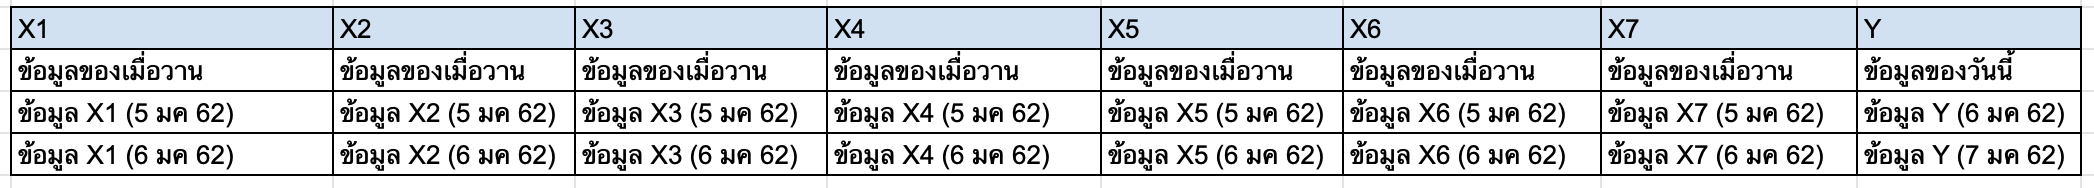

In [257]:
import pandas as pd
import numpy as np

In [258]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/BSC_DRDM23/อุตุ'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#จังหวัดขอนแก่น

In [259]:
# นำข้อมูลเข้า จ.ขอนแก่น
PS_kk = pd.read_excel('/content/drive/MyDrive/BSC_DRDM23/อุตุ/ความกด(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx', header=4) #ความกดอากาศ
RH_kk = pd.read_excel('/content/drive/MyDrive/BSC_DRDM23/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx', header=4) #ความชื้นสัมพันธ์
WS_kk =  pd.read_excel('/content/drive/MyDrive/BSC_DRDM23/อุตุ/ความเร็วลม(นอต)/จ.ขอนแก่น.xlsx', header=4) #ความเร็วลม
CD_kk =  pd.read_excel('/content/drive/MyDrive/BSC_DRDM23/อุตุ/จำนวนเมฆ(10ส่วน)/จ.ขอนแก่น.xlsx', header=4) #จำนวนเมฆ
R_kk =  pd.read_excel('/content/drive/MyDrive/BSC_DRDM23/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.ขอนแก่น.xlsx', header=4) #ปริมาณฝน
DPT_kk =  pd.read_excel('/content/drive/MyDrive/BSC_DRDM23/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.ขอนแก่น.xlsx', header=4) #อุณหภูมิจุดน้ำค้าง
BT_kk =  pd.read_excel('/content/drive/MyDrive/BSC_DRDM23/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.ขอนแก่น.xlsx', header=4) #อุณหภูมิตุ้มแห้ง
LW_kk =  pd.read_excel('/content/drive/MyDrive/BSC_DRDM23/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.ขอนแก่น.xlsx', header=4) #อุณหภูมิต่ำสุด


In [260]:
RH_kk.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,83,92,86,80,86,86,83,...,73,72,73,69,69,75,71,71,68,79
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,71,65,68,65,65,68,69,...,65,66,65,67,68,67,67,65,-,68
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,66,61,61,62,61,60,69,...,63,62,60,60,62,65,66,63,64,63
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,65,66,69,63,64,68,65,...,80,74,75,71,75,69,70,67,68,69
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,71,72,71,72,70,68,61,...,58,53,48,57,71,73,68,-,-,65


##เปลี่ยนชื่อ column,จัดการข้อมูล

In [261]:
PS_kk.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
PS_kk.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
PS_kk.rename(columns={'Unnamed: 2' : 'เดือน/ปี'},inplace=True)
PS_kk.head()

,id,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,...,1010.76,1010.23,1011.34,1011.84,1011.89,1012.29,1011.67,1011.3,1011.52,1010.350645
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,...,1014.07,1015.40,1013.95,1012.35,1011.31,1009.59,1010.13,1010.47,-,1011.717000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,...,1012.88,1015.78,1018.56,1018.65,1016.88,1016.05,1014.98,1015.53,1016.4,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,...,1010.91,1011.27,1011.65,1012.56,1010.76,1010.26,1010.69,1012.34,1014.52,1012.484516
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,...,1005.75,1005.46,1004.80,1005.08,1006.57,1005.96,1006.53,1010.47,-,1009.749667


In [262]:
PS_KK = PS_kk.drop(['Unnamed: 34'], axis=1)

In [263]:
PS_KK['ปี'] = PS_KK['เดือน/ปี'].dt.year
PS_KK['เดือน'] = PS_KK['เดือน/ปี'].dt.month
PS_KK = PS_KK.drop(['เดือน/ปี'], axis=1)
PS_KK.head()

,id,สถานี,1,2,3,4,5,6,7,8,...,24,25,26,27,28,29,30,31,ปี,เดือน
0,1,352201-หนองคาย จ.หนองคาย,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,1010.20,...,1010.23,1011.34,1011.84,1011.89,1012.29,1011.67,1011.3,1011.52,2011,10
1,2,352201-หนองคาย จ.หนองคาย,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,1007.20,...,1015.40,1013.95,1012.35,1011.31,1009.59,1010.13,1010.47,-,2011,11
2,3,352201-หนองคาย จ.หนองคาย,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,1011.94,...,1015.78,1018.56,1018.65,1016.88,1016.05,1014.98,1015.53,1016.4,2011,12
3,1,352201-หนองคาย จ.หนองคาย,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,1018.06,...,1011.27,1011.65,1012.56,1010.76,1010.26,1010.69,1012.34,1014.52,2012,1
4,2,352201-หนองคาย จ.หนองคาย,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,1009.66,...,1005.46,1004.80,1005.08,1006.57,1005.96,1006.53,1010.47,-,2012,2


In [264]:
PS_KK_1 = PS_KK.set_index(['สถานี','id','ปี','เดือน']).stack().reset_index()
PS_KK_1.rename(columns={'level_4' : 'วัน'},inplace=True)
PS_KK_1.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
PS_KK_1

,สถานี,id,ปี,เดือน,วัน,ความกดอากาศ(%)
0,352201-หนองคาย จ.หนองคาย,1,2011,10,1,1005.47
1,352201-หนองคาย จ.หนองคาย,1,2011,10,2,1006.65
2,352201-หนองคาย จ.หนองคาย,1,2011,10,3,1007.49
3,352201-หนองคาย จ.หนองคาย,1,2011,10,4,1008.28
4,352201-หนองคาย จ.หนองคาย,1,2011,10,5,1009.88
...,...,...,...,...,...,...
1700,352201-หนองคาย จ.หนองคาย,2,2022,2,27,1014.37
1701,352201-หนองคาย จ.หนองคาย,2,2022,2,28,1013.04
1702,352201-หนองคาย จ.หนองคาย,2,2022,2,29,1013.37
1703,352201-หนองคาย จ.หนองคาย,2,2022,2,30,1013.98


In [265]:
PS_KK_1['จังหวัด'] = len(PS_KK_1)*['ขอนแก่น']
PS_KK_1

,สถานี,id,ปี,เดือน,วัน,ความกดอากาศ(%),จังหวัด
0,352201-หนองคาย จ.หนองคาย,1,2011,10,1,1005.47,ขอนแก่น
1,352201-หนองคาย จ.หนองคาย,1,2011,10,2,1006.65,ขอนแก่น
2,352201-หนองคาย จ.หนองคาย,1,2011,10,3,1007.49,ขอนแก่น
3,352201-หนองคาย จ.หนองคาย,1,2011,10,4,1008.28,ขอนแก่น
4,352201-หนองคาย จ.หนองคาย,1,2011,10,5,1009.88,ขอนแก่น
...,...,...,...,...,...,...,...
1700,352201-หนองคาย จ.หนองคาย,2,2022,2,27,1014.37,ขอนแก่น
1701,352201-หนองคาย จ.หนองคาย,2,2022,2,28,1013.04,ขอนแก่น
1702,352201-หนองคาย จ.หนองคาย,2,2022,2,29,1013.37,ขอนแก่น
1703,352201-หนองคาย จ.หนองคาย,2,2022,2,30,1013.98,ขอนแก่น


In [266]:
PS_KK_2 = PS_KK_1[['จังหวัด','ปี','เดือน','วัน','ความกดอากาศ(%)']].reset_index()
PS_KK_3 = PS_KK_2[['จังหวัด','index','ปี','เดือน','วัน','ความกดอากาศ(%)']]
PS_KK_3

,จังหวัด,index,ปี,เดือน,วัน,ความกดอากาศ(%)
0,ขอนแก่น,0,2011,10,1,1005.47
1,ขอนแก่น,1,2011,10,2,1006.65
2,ขอนแก่น,2,2011,10,3,1007.49
3,ขอนแก่น,3,2011,10,4,1008.28
4,ขอนแก่น,4,2011,10,5,1009.88
...,...,...,...,...,...,...
1700,ขอนแก่น,1700,2022,2,27,1014.37
1701,ขอนแก่น,1701,2022,2,28,1013.04
1702,ขอนแก่น,1702,2022,2,29,1013.37
1703,ขอนแก่น,1703,2022,2,30,1013.98


In [267]:
PS_KK_3["id"] = ['kk'] + PS_KK_3["index"].astype(str)
PS_KK_3.drop(['index'],axis=1)

<ipython-input-267-9f156fcdf658>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PS_KK_3["id"] = ['kk'] + PS_KK_3["index"].astype(str)


,จังหวัด,ปี,เดือน,วัน,ความกดอากาศ(%),id
0,ขอนแก่น,2011,10,1,1005.47,kk0
1,ขอนแก่น,2011,10,2,1006.65,kk1
2,ขอนแก่น,2011,10,3,1007.49,kk2
3,ขอนแก่น,2011,10,4,1008.28,kk3
4,ขอนแก่น,2011,10,5,1009.88,kk4
...,...,...,...,...,...,...
1700,ขอนแก่น,2022,2,27,1014.37,kk1700
1701,ขอนแก่น,2022,2,28,1013.04,kk1701
1702,ขอนแก่น,2022,2,29,1013.37,kk1702
1703,ขอนแก่น,2022,2,30,1013.98,kk1703


In [268]:
PS_KK_4 = PS_KK_3[['id','จังหวัด','ปี','เดือน','วัน','ความกดอากาศ(%)']]
PS_KK_4

,id,จังหวัด,ปี,เดือน,วัน,ความกดอากาศ(%)
0,kk0,ขอนแก่น,2011,10,1,1005.47
1,kk1,ขอนแก่น,2011,10,2,1006.65
2,kk2,ขอนแก่น,2011,10,3,1007.49
3,kk3,ขอนแก่น,2011,10,4,1008.28
4,kk4,ขอนแก่น,2011,10,5,1009.88
...,...,...,...,...,...,...
1700,kk1700,ขอนแก่น,2022,2,27,1014.37
1701,kk1701,ขอนแก่น,2022,2,28,1013.04
1702,kk1702,ขอนแก่น,2022,2,29,1013.37
1703,kk1703,ขอนแก่น,2022,2,30,1013.98


In [269]:
RH_kk.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
RH_kk.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
RH_kk.rename(columns={'Unnamed: 2' : 'เดือน/ปี'},inplace=True)
RH_kk.head()

,id,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,83,92,86,80,86,86,83,...,73,72,73,69,69,75,71,71,68,79
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,71,65,68,65,65,68,69,...,65,66,65,67,68,67,67,65,-,68
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,66,61,61,62,61,60,69,...,63,62,60,60,62,65,66,63,64,63
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,65,66,69,63,64,68,65,...,80,74,75,71,75,69,70,67,68,69
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,71,72,71,72,70,68,61,...,58,53,48,57,71,73,68,-,-,65


In [270]:
RH_KK = RH_kk.drop(['Unnamed: 34'], axis=1)
RH_KK['ปี'] = RH_KK['เดือน/ปี'].dt.year
RH_KK['เดือน'] = RH_KK['เดือน/ปี'].dt.month
RH_KK = RH_KK.drop(['เดือน/ปี'], axis=1)
RH_KK.head()

,id,สถานี,1,2,3,4,5,6,7,8,...,24,25,26,27,28,29,30,31,ปี,เดือน
0,1,381201-ขอนแก่น จ.ขอนแก่น,83,92,86,80,86,86,83,82,...,72,73,69,69,75,71,71,68,2011,10
1,2,381201-ขอนแก่น จ.ขอนแก่น,71,65,68,65,65,68,69,69,...,66,65,67,68,67,67,65,-,2011,11
2,3,381201-ขอนแก่น จ.ขอนแก่น,66,61,61,62,61,60,69,68,...,62,60,60,62,65,66,63,64,2011,12
3,1,381201-ขอนแก่น จ.ขอนแก่น,65,66,69,63,64,68,65,62,...,74,75,71,75,69,70,67,68,2012,1
4,2,381201-ขอนแก่น จ.ขอนแก่น,71,72,71,72,70,68,61,69,...,53,48,57,71,73,68,-,-,2012,2


In [271]:
RH_KK_1 = RH_KK.set_index(['สถานี','id','ปี','เดือน']).stack().reset_index()
RH_KK_1.rename(columns={'level_4' : 'วัน'},inplace=True)
RH_KK_1.rename(columns={0 : 'ความชื้นสัมพัทธ์(%)'},inplace=True)
RH_KK_1

RH_KK_1['จังหวัด'] = len(RH_KK_1)*['ขอนแก่น']
RH_KK_1

RH_KK_2 = RH_KK_1[['จังหวัด','ปี','เดือน','วัน','ความชื้นสัมพัทธ์(%)']].reset_index()
RH_KK_3 = RH_KK_2[['จังหวัด','index','ปี','เดือน','วัน','ความชื้นสัมพัทธ์(%)']]
RH_KK_3

RH_KK_3["id"] = ['kk'] + RH_KK_3["index"].astype(str)
RH_KK_3.drop(['index'],axis=1)

RH_KK_4 = RH_KK_3[['id','จังหวัด','ปี','เดือน','วัน','ความชื้นสัมพัทธ์(%)']]
RH_KK_4

<ipython-input-271-5382cda3e5e6>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RH_KK_3["id"] = ['kk'] + RH_KK_3["index"].astype(str)


,id,จังหวัด,ปี,เดือน,วัน,ความชื้นสัมพัทธ์(%)
0,kk0,ขอนแก่น,2011,10,1,83
1,kk1,ขอนแก่น,2011,10,2,92
2,kk2,ขอนแก่น,2011,10,3,86
3,kk3,ขอนแก่น,2011,10,4,80
4,kk4,ขอนแก่น,2011,10,5,86
...,...,...,...,...,...,...
1700,kk1700,ขอนแก่น,2022,2,27,58
1701,kk1701,ขอนแก่น,2022,2,28,62
1702,kk1702,ขอนแก่น,2022,2,29,-
1703,kk1703,ขอนแก่น,2022,2,30,-


In [272]:
WS_kk.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
WS_kk.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
WS_kk.rename(columns={'Unnamed: 2' : 'เดือน/ปี'},inplace=True)
WS_kk.head()

,id,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,3,2,3,2,2,3,4,...,2,3,5,5,5,4,6,4,5,3.354839
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,4,5,3,3,5,2,3,...,7,6,5,5,3,1,3,3,-,3.466667
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,3,4,4,4,4,4,4,...,5,6,7,6,5,4,4,6,5,4.806452
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,4,2,1,4,4,2,4,...,3,3,4,2,2,1,3,4,4,3.129032
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,2,2,3,2,3,1,2,...,1,2,3,2,4,3,3,3,-,2.566667


In [273]:
WS_KK = WS_kk.drop(['Unnamed: 34'], axis=1)
WS_KK['ปี'] = WS_KK['เดือน/ปี'].dt.year
WS_KK['เดือน'] = WS_KK['เดือน/ปี'].dt.month
WS_KK = WS_KK.drop(['เดือน/ปี'], axis=1)
WS_KK.head()

WS_KK_1 = WS_KK.set_index(['สถานี','id','ปี','เดือน']).stack().reset_index()
WS_KK_1.rename(columns={'level_4' : 'วัน'},inplace=True)
WS_KK_1.rename(columns={0 : 'ความเร็วลม(นอต)'},inplace=True)
WS_KK_1

WS_KK_1['จังหวัด'] = len(WS_KK_1)*['ขอนแก่น']
WS_KK_1

WS_KK_2 = WS_KK_1[['จังหวัด','ปี','เดือน','วัน','ความเร็วลม(นอต)']].reset_index()
WS_KK_3 = WS_KK_2[['จังหวัด','index','ปี','เดือน','วัน','ความเร็วลม(นอต)']]
WS_KK_3

WS_KK_3["id"] = ['kk'] + WS_KK_3["index"].astype(str)
WS_KK_3.drop(['index'],axis=1)

WS_KK_4 = WS_KK_3[['id','จังหวัด','ปี','เดือน','วัน','ความเร็วลม(นอต)']]
WS_KK_4


<ipython-input-273-6c77c1de697b>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WS_KK_3["id"] = ['kk'] + WS_KK_3["index"].astype(str)


,id,จังหวัด,ปี,เดือน,วัน,ความเร็วลม(นอต)
0,kk0,ขอนแก่น,2011,10,1,3
1,kk1,ขอนแก่น,2011,10,2,2
2,kk2,ขอนแก่น,2011,10,3,3
3,kk3,ขอนแก่น,2011,10,4,2
4,kk4,ขอนแก่น,2011,10,5,2
...,...,...,...,...,...,...
1700,kk1700,ขอนแก่น,2022,2,27,2
1701,kk1701,ขอนแก่น,2022,2,28,2
1702,kk1702,ขอนแก่น,2022,2,29,-
1703,kk1703,ขอนแก่น,2022,2,30,-


In [274]:
CD_kk.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
CD_kk.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
CD_kk.rename(columns={'Unnamed: 2' : 'เดือน/ปี'},inplace=True)
CD_kk.head()

CD_KK = CD_kk.drop(['Unnamed: 34'], axis=1)
CD_KK['ปี'] = CD_KK['เดือน/ปี'].dt.year
CD_KK['เดือน'] = CD_KK['เดือน/ปี'].dt.month
CD_KK = CD_KK.drop(['เดือน/ปี'], axis=1)
CD_KK.head()

CD_KK_1 = CD_KK.set_index(['สถานี','id','ปี','เดือน']).stack().reset_index()
CD_KK_1.rename(columns={'level_4' : 'วัน'},inplace=True)
CD_KK_1.rename(columns={0 : 'จำนวนเมฆ(10ส่วน)'},inplace=True)
CD_KK_1

CD_KK_1['จังหวัด'] = len(CD_KK_1)*['ขอนแก่น']
CD_KK_1

CD_KK_2 = CD_KK_1[['จังหวัด','ปี','เดือน','วัน','จำนวนเมฆ(10ส่วน)']].reset_index()
CD_KK_3 = CD_KK_2[['จังหวัด','index','ปี','เดือน','วัน','จำนวนเมฆ(10ส่วน)']]
CD_KK_3

CD_KK_3["id"] = ['kk'] + CD_KK_3["index"].astype(str)
CD_KK_3.drop(['index'],axis=1)

CD_KK_4 = CD_KK_3[['id','จังหวัด','ปี','เดือน','วัน','จำนวนเมฆ(10ส่วน)']]
CD_KK_4

<ipython-input-274-788f7ad1aeaa>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CD_KK_3["id"] = ['kk'] + CD_KK_3["index"].astype(str)


,id,จังหวัด,ปี,เดือน,วัน,จำนวนเมฆ(10ส่วน)
0,kk0,ขอนแก่น,2011,10,1,9
1,kk1,ขอนแก่น,2011,10,2,10
2,kk2,ขอนแก่น,2011,10,3,10
3,kk3,ขอนแก่น,2011,10,4,8
4,kk4,ขอนแก่น,2011,10,5,10
...,...,...,...,...,...,...
1700,kk1700,ขอนแก่น,2022,2,27,2
1701,kk1701,ขอนแก่น,2022,2,28,2
1702,kk1702,ขอนแก่น,2022,2,29,-
1703,kk1703,ขอนแก่น,2022,2,30,-


In [275]:
R_kk.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
R_kk.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
R_kk.rename(columns={'Unnamed: 2' : 'เดือน/ปี'},inplace=True)
R_kk.head()

R_KK = R_kk.drop(['Unnamed: 34'], axis=1)
R_KK['ปี'] = R_KK['เดือน/ปี'].dt.year
R_KK['เดือน'] = R_KK['เดือน/ปี'].dt.month
R_KK = R_KK.drop(['เดือน/ปี'], axis=1)
R_KK.head()

R_KK_1 = R_KK.set_index(['สถานี','id','ปี','เดือน']).stack().reset_index()
R_KK_1.rename(columns={'level_4' : 'วัน'},inplace=True)
R_KK_1.rename(columns={0 : 'ปริมาณน้ำฝน(มิลลิเมตร)'},inplace=True)
R_KK_1

R_KK_1['จังหวัด'] = len(R_KK_1)*['ขอนแก่น']
R_KK_1

R_KK_2 = R_KK_1[['จังหวัด','ปี','เดือน','วัน','ปริมาณน้ำฝน(มิลลิเมตร)']].reset_index()
R_KK_3 = R_KK_2[['จังหวัด','index','ปี','เดือน','วัน','ปริมาณน้ำฝน(มิลลิเมตร)']]
R_KK_3

R_KK_3["id"] = ['kk'] + R_KK_3["index"].astype(str)
R_KK_3.drop(['index'],axis=1)

R_KK_4 = R_KK_3[['id','จังหวัด','ปี','เดือน','วัน','ปริมาณน้ำฝน(มิลลิเมตร)']]
R_KK_4

<ipython-input-275-25c01f2d27a2>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R_KK_3["id"] = ['kk'] + R_KK_3["index"].astype(str)


,id,จังหวัด,ปี,เดือน,วัน,ปริมาณน้ำฝน(มิลลิเมตร)
0,kk0,ขอนแก่น,2011,10,1,1.4
1,kk1,ขอนแก่น,2011,10,2,17.7
2,kk2,ขอนแก่น,2011,10,3,3
3,kk3,ขอนแก่น,2011,10,4,0
4,kk4,ขอนแก่น,2011,10,5,2.2
...,...,...,...,...,...,...
1700,kk1700,ขอนแก่น,2022,2,27,0
1701,kk1701,ขอนแก่น,2022,2,28,-
1702,kk1702,ขอนแก่น,2022,2,29,-
1703,kk1703,ขอนแก่น,2022,2,30,-


In [276]:
DPT_kk.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
DPT_kk.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
DPT_kk.rename(columns={'Unnamed: 2' : 'เดือน/ปี'},inplace=True)
DPT_kk.head()

DPT_KK = DPT_kk.drop(['Unnamed: 34'], axis=1)
DPT_KK['ปี'] = DPT_KK['เดือน/ปี'].dt.year
DPT_KK['เดือน'] = DPT_KK['เดือน/ปี'].dt.month
DPT_KK = DPT_KK.drop(['เดือน/ปี'], axis=1)
DPT_KK.head()

DPT_KK_1 = DPT_KK.set_index(['สถานี','id','ปี','เดือน']).stack().reset_index()
DPT_KK_1.rename(columns={'level_4' : 'วัน'},inplace=True)
DPT_KK_1.rename(columns={0 : 'อุณหภูมิจุดน้ำค้าง(เซลเซียส)'},inplace=True)
DPT_KK_1

DPT_KK_1['จังหวัด'] = len(DPT_KK_1)*['ขอนแก่น']
DPT_KK_1

DPT_KK_2 = DPT_KK_1[['จังหวัด','ปี','เดือน','วัน','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']].reset_index()
DPT_KK_3 = DPT_KK_2[['จังหวัด','index','ปี','เดือน','วัน','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']]
DPT_KK_3

DPT_KK_3["id"] = ['kk'] + DPT_KK_3["index"].astype(str)
DPT_KK_3.drop(['index'],axis=1)

DPT_KK_4 = DPT_KK_3[['id','จังหวัด','ปี','เดือน','วัน','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']]
DPT_KK_4

<ipython-input-276-04991f60d18a>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DPT_KK_3["id"] = ['kk'] + DPT_KK_3["index"].astype(str)


,id,จังหวัด,ปี,เดือน,วัน,อุณหภูมิจุดน้ำค้าง(เซลเซียส)
0,kk0,ขอนแก่น,2011,10,1,24.2
1,kk1,ขอนแก่น,2011,10,2,24.0
2,kk2,ขอนแก่น,2011,10,3,22.9
3,kk3,ขอนแก่น,2011,10,4,21.9
4,kk4,ขอนแก่น,2011,10,5,21.7
...,...,...,...,...,...,...
1700,kk1700,ขอนแก่น,2022,2,27,15.7
1701,kk1701,ขอนแก่น,2022,2,28,17.5
1702,kk1702,ขอนแก่น,2022,2,29,-
1703,kk1703,ขอนแก่น,2022,2,30,-


In [277]:
BT_kk.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
BT_kk.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
BT_kk.rename(columns={'Unnamed: 2' : 'เดือน/ปี'},inplace=True)
BT_kk.head()

BT_KK = BT_kk.drop(['Unnamed: 34'], axis=1)
BT_KK['ปี'] = BT_KK['เดือน/ปี'].dt.year
BT_KK['เดือน'] = BT_KK['เดือน/ปี'].dt.month
BT_KK = BT_KK.drop(['เดือน/ปี'], axis=1)
BT_KK.head()

BT_KK_1 = BT_KK.set_index(['สถานี','id','ปี','เดือน']).stack().reset_index()
BT_KK_1.rename(columns={'level_4' : 'วัน'},inplace=True)
BT_KK_1.rename(columns={0 : 'อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)'},inplace=True)
BT_KK_1

BT_KK_1['จังหวัด'] = len(BT_KK_1)*['ขอนแก่น']
BT_KK_1

BT_KK_2 = BT_KK_1[['จังหวัด','ปี','เดือน','วัน','อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)']].reset_index()
BT_KK_3 = BT_KK_2[['จังหวัด','index','ปี','เดือน','วัน','อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)']]
BT_KK_3

BT_KK_3["id"] = ['kk'] + BT_KK_3["index"].astype(str)
BT_KK_3.drop(['index'],axis=1)

BT_KK_4 = BT_KK_3[['id','จังหวัด','ปี','เดือน','วัน','อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)']]
BT_KK_4

<ipython-input-277-98ff1fd1450f>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BT_KK_3["id"] = ['kk'] + BT_KK_3["index"].astype(str)


,id,จังหวัด,ปี,เดือน,วัน,อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)
0,kk0,ขอนแก่น,2011,10,1,27.6
1,kk1,ขอนแก่น,2011,10,2,25.6
2,kk2,ขอนแก่น,2011,10,3,25.6
3,kk3,ขอนแก่น,2011,10,4,25.8
4,kk4,ขอนแก่น,2011,10,5,24.3
...,...,...,...,...,...,...
1700,kk1700,ขอนแก่น,2022,2,27,25.1
1701,kk1701,ขอนแก่น,2022,2,28,25.9
1702,kk1702,ขอนแก่น,2022,2,29,-
1703,kk1703,ขอนแก่น,2022,2,30,-


In [278]:
LW_kk.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
LW_kk.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
LW_kk.rename(columns={'Unnamed: 2' : 'เดือน/ปี'},inplace=True)
LW_kk.head()

LW_KK = LW_kk.drop(['Unnamed: 34'], axis=1)
LW_KK['ปี'] = LW_KK['เดือน/ปี'].dt.year
LW_KK['เดือน'] = LW_KK['เดือน/ปี'].dt.month
LW_KK = LW_KK.drop(['เดือน/ปี'], axis=1)
LW_KK.head()

LW_KK_1 = LW_KK.set_index(['สถานี','id','ปี','เดือน']).stack().reset_index()
LW_KK_1.rename(columns={'level_4' : 'วัน'},inplace=True)
LW_KK_1.rename(columns={0 : 'อุณหภูมิจุดต่ำสุด(เซลเซียส)'},inplace=True)
LW_KK_1

LW_KK_1['จังหวัด'] = len(LW_KK_1)*['ขอนแก่น']
LW_KK_1

LW_KK_2 = LW_KK_1[['จังหวัด','ปี','เดือน','วัน','อุณหภูมิจุดต่ำสุด(เซลเซียส)']].reset_index()
LW_KK_3 = LW_KK_2[['จังหวัด','index','ปี','เดือน','วัน','อุณหภูมิจุดต่ำสุด(เซลเซียส)']]
LW_KK_3

LW_KK_3["id"] = ['kk'] + LW_KK_3["index"].astype(str)
LW_KK_3.drop(['index'],axis=1)

LW_KK_4 = LW_KK_3[['id','จังหวัด','ปี','เดือน','วัน','อุณหภูมิจุดต่ำสุด(เซลเซียส)']]
LW_KK_4

<ipython-input-278-7ab27cac6407>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LW_KK_3["id"] = ['kk'] + LW_KK_3["index"].astype(str)


,id,จังหวัด,ปี,เดือน,วัน,อุณหภูมิจุดต่ำสุด(เซลเซียส)
0,kk0,ขอนแก่น,2011,10,1,24.8
1,kk1,ขอนแก่น,2011,10,2,23.0
2,kk2,ขอนแก่น,2011,10,3,22.1
3,kk3,ขอนแก่น,2011,10,4,22.8
4,kk4,ขอนแก่น,2011,10,5,23.1
...,...,...,...,...,...,...
1700,kk1700,ขอนแก่น,2022,2,27,18.2
1701,kk1701,ขอนแก่น,2022,2,28,-
1702,kk1702,ขอนแก่น,2022,2,29,-
1703,kk1703,ขอนแก่น,2022,2,30,-


##merge จังหวัดขอนแก่น

In [279]:
merged_KK = pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(
            pd.merge(PS_KK_4[['id','จังหวัด','ปี','เดือน','วัน','ความกดอากาศ(%)']],
            RH_KK_4[['id','ความชื้นสัมพัทธ์(%)']], on='id'),
            WS_KK_4[['id','ความเร็วลม(นอต)']], on='id'),
            CD_KK_4[['id','จำนวนเมฆ(10ส่วน)']], on='id'),
            R_KK_4[['id','ปริมาณน้ำฝน(มิลลิเมตร)']], on='id'),
            DPT_KK_4[['id','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']], on='id'),
            BT_KK_4[['id','อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)']], on='id'),
            LW_KK_4[['id','อุณหภูมิจุดต่ำสุด(เซลเซียส)']], on='id')
merged_KK

,id,จังหวัด,ปี,เดือน,วัน,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),ปริมาณน้ำฝน(มิลลิเมตร),อุณหภูมิจุดน้ำค้าง(เซลเซียส),อุณหภูมิจุดตุ้มแห้ง(เซลเซียส),อุณหภูมิจุดต่ำสุด(เซลเซียส)
0,kk0,ขอนแก่น,2011,10,1,1005.47,83,3,9,1.4,24.2,27.6,24.8
1,kk1,ขอนแก่น,2011,10,2,1006.65,92,2,10,17.7,24.0,25.6,23.0
2,kk2,ขอนแก่น,2011,10,3,1007.49,86,3,10,3,22.9,25.6,22.1
3,kk3,ขอนแก่น,2011,10,4,1008.28,80,2,8,0,21.9,25.8,22.8
4,kk4,ขอนแก่น,2011,10,5,1009.88,86,2,10,2.2,21.7,24.3,23.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,kk1700,ขอนแก่น,2022,2,27,1014.37,58,2,2,0,15.7,25.1,18.2
1701,kk1701,ขอนแก่น,2022,2,28,1013.04,62,2,2,-,17.5,25.9,-
1702,kk1702,ขอนแก่น,2022,2,29,1013.37,-,-,-,-,-,-,-
1703,kk1703,ขอนแก่น,2022,2,30,1013.98,-,-,-,-,-,-,-


## จัดการค่า missing ด้วยค่า mean

In [280]:
khonkaen = merged_KK.replace({'-': np.NaN})
khonkaen

,id,จังหวัด,ปี,เดือน,วัน,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),ปริมาณน้ำฝน(มิลลิเมตร),อุณหภูมิจุดน้ำค้าง(เซลเซียส),อุณหภูมิจุดตุ้มแห้ง(เซลเซียส),อุณหภูมิจุดต่ำสุด(เซลเซียส)
0,kk0,ขอนแก่น,2011,10,1,1005.47,83.0,3.0,9.0,1.4,24.2,27.6,24.8
1,kk1,ขอนแก่น,2011,10,2,1006.65,92.0,2.0,10.0,17.7,24.0,25.6,23.0
2,kk2,ขอนแก่น,2011,10,3,1007.49,86.0,3.0,10.0,3,22.9,25.6,22.1
3,kk3,ขอนแก่น,2011,10,4,1008.28,80.0,2.0,8.0,0,21.9,25.8,22.8
4,kk4,ขอนแก่น,2011,10,5,1009.88,86.0,2.0,10.0,2.2,21.7,24.3,23.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,kk1700,ขอนแก่น,2022,2,27,1014.37,58.0,2.0,2.0,0,15.7,25.1,18.2
1701,kk1701,ขอนแก่น,2022,2,28,1013.04,62.0,2.0,2.0,NaN,17.5,25.9,NaN
1702,kk1702,ขอนแก่น,2022,2,29,1013.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1703,kk1703,ขอนแก่น,2022,2,30,1013.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [281]:
khonkaen.isnull().any() #ตรวจสอบ missing

id                               False
จังหวัด                          False
ปี                               False
เดือน                            False
วัน                              False
ความกดอากาศ(%)                    True
ความชื้นสัมพัทธ์(%)               True
ความเร็วลม(นอต)                   True
จำนวนเมฆ(10ส่วน)                  True
ปริมาณน้ำฝน(มิลลิเมตร)            True
อุณหภูมิจุดน้ำค้าง(เซลเซียส)      True
อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)     True
อุณหภูมิจุดต่ำสุด(เซลเซียส)       True
dtype: bool

In [282]:
khonkaen.dtypes #ตรวจสอบชนิดของแต่ละคอลัมน์

id                                object
จังหวัด                           object
ปี                                 int64
เดือน                              int64
วัน                                int64
ความกดอากาศ(%)                   float64
ความชื้นสัมพัทธ์(%)              float64
ความเร็วลม(นอต)                  float64
จำนวนเมฆ(10ส่วน)                 float64
ปริมาณน้ำฝน(มิลลิเมตร)            object
อุณหภูมิจุดน้ำค้าง(เซลเซียส)     float64
อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)    float64
อุณหภูมิจุดต่ำสุด(เซลเซียส)      float64
dtype: object

In [283]:
khonkaen['ปริมาณน้ำฝน(มิลลิเมตร)'] = pd.to_numeric(khonkaen['ปริมาณน้ำฝน(มิลลิเมตร)'], errors='coerce') #เปลี่ยน str เป็น float เพื่อให้หา meanได้

In [284]:
khonkaen.dtypes

id                                object
จังหวัด                           object
ปี                                 int64
เดือน                              int64
วัน                                int64
ความกดอากาศ(%)                   float64
ความชื้นสัมพัทธ์(%)              float64
ความเร็วลม(นอต)                  float64
จำนวนเมฆ(10ส่วน)                 float64
ปริมาณน้ำฝน(มิลลิเมตร)           float64
อุณหภูมิจุดน้ำค้าง(เซลเซียส)     float64
อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)    float64
อุณหภูมิจุดต่ำสุด(เซลเซียส)      float64
dtype: object

In [285]:
mean_ps_kk = khonkaen['ความกดอากาศ(%)'].mean()
mean_ps_kk

1012.6146563060371

In [286]:
khonkaen['ความกดอากาศ(%)'] = khonkaen['ความกดอากาศ(%)'].fillna(mean_ps_kk)

In [287]:
khonkaen.isnull().any()

id                               False
จังหวัด                          False
ปี                               False
เดือน                            False
วัน                              False
ความกดอากาศ(%)                   False
ความชื้นสัมพัทธ์(%)               True
ความเร็วลม(นอต)                   True
จำนวนเมฆ(10ส่วน)                  True
ปริมาณน้ำฝน(มิลลิเมตร)            True
อุณหภูมิจุดน้ำค้าง(เซลเซียส)      True
อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)     True
อุณหภูมิจุดต่ำสุด(เซลเซียส)       True
dtype: bool

In [365]:
mean_rh_kk = khonkaen['ความชื้นสัมพัทธ์(%)'].mean()
mean_ws_kk = khonkaen['ความเร็วลม(นอต)'].mean()
mean_cd_kk = khonkaen['จำนวนเมฆ(10ส่วน)'].mean()
mean_dpt_kk = khonkaen['อุณหภูมิจุดน้ำค้าง(เซลเซียส)'].mean()
mean_bt_kk = khonkaen['อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)'].mean()
mean_lw_kk = khonkaen['อุณหภูมิจุดต่ำสุด(เซลเซียส)'].mean()

In [366]:
khonkaen['ความชื้นสัมพัทธ์(%)'] = khonkaen['ความชื้นสัมพัทธ์(%)'].fillna(mean_rh_kk)
khonkaen['ความเร็วลม(นอต)'] = khonkaen['ความเร็วลม(นอต)'].fillna(mean_ws_kk)
khonkaen['จำนวนเมฆ(10ส่วน)'] = khonkaen['จำนวนเมฆ(10ส่วน)'].fillna(mean_cd_kk)
khonkaen['ปริมาณน้ำฝน(มิลลิเมตร)'] = khonkaen['ปริมาณน้ำฝน(มิลลิเมตร)'].fillna(0)
khonkaen['อุณหภูมิจุดน้ำค้าง(เซลเซียส)'] = khonkaen['อุณหภูมิจุดน้ำค้าง(เซลเซียส)'].fillna(mean_dpt_kk)
khonkaen['อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)'] = khonkaen['อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)'].fillna(mean_bt_kk)
khonkaen['อุณหภูมิจุดต่ำสุด(เซลเซียส)'] = khonkaen['อุณหภูมิจุดต่ำสุด(เซลเซียส)'].fillna(mean_lw_kk)

In [367]:
khonkaen

,id,จังหวัด,ปี,เดือน,วัน,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),ปริมาณน้ำฝน(มิลลิเมตร),อุณหภูมิจุดน้ำค้าง(เซลเซียส),อุณหภูมิจุดตุ้มแห้ง(เซลเซียส),อุณหภูมิจุดต่ำสุด(เซลเซียส)
0,kk0,ขอนแก่น,2011,10,1,1005.470000,83.000000,3.000000,9.000000,1.400000,24.200000,27.600000,24.800000
1,kk1,ขอนแก่น,2011,10,2,1006.650000,92.000000,2.000000,10.000000,17.700000,24.000000,25.600000,23.000000
2,kk2,ขอนแก่น,2011,10,3,1007.490000,86.000000,3.000000,10.000000,3.000000,22.900000,25.600000,22.100000
3,kk3,ขอนแก่น,2011,10,4,1008.280000,80.000000,2.000000,8.000000,0.000000,21.900000,25.800000,22.800000
4,kk4,ขอนแก่น,2011,10,5,1009.880000,86.000000,2.000000,10.000000,2.200000,21.700000,24.300000,23.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,kk1700,ขอนแก่น,2022,2,27,1014.370000,58.000000,2.000000,2.000000,0.000000,15.700000,25.100000,18.200000
1701,kk1701,ขอนแก่น,2022,2,28,1013.040000,62.000000,2.000000,2.000000,1.815934,17.500000,25.900000,20.430345
1702,kk1702,ขอนแก่น,2022,2,29,1013.370000,66.821514,3.204423,3.345487,1.815934,18.256971,25.447837,20.430345
1703,kk1703,ขอนแก่น,2022,2,30,1013.980000,66.821514,3.204423,3.345487,1.815934,18.256971,25.447837,20.430345


#จังหวัดนครพนม

In [291]:
# นำข้อมูลเข้า จ.นครพนม
PS_np = pd.read_excel('/content/drive/MyDrive/BSC_DRDM23/อุตุ/ความกด(เปอร์เซ็นต์)/จ.นครพนม.xlsx', header=4) #ความกดอากาศ
RH_np = pd.read_excel('/content/drive/MyDrive/BSC_DRDM23/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.นครพนม.xlsx', header=4) #ความชื้นสัมพันธ์
WS_np =  pd.read_excel('/content/drive/MyDrive/BSC_DRDM23/อุตุ/ความเร็วลม(นอต)/จ.นครพนม.xlsx', header=4) #ความเร็วลม
CD_np =  pd.read_excel('/content/drive/MyDrive/BSC_DRDM23/อุตุ/จำนวนเมฆ(10ส่วน)/จ.นครพนม.xlsx', header=4) #จำนวนเมฆ
R_np =  pd.read_excel('/content/drive/MyDrive/BSC_DRDM23/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.นครพนม.xlsx', header=4) #ปริมาณฝน
DPT_np =  pd.read_excel('/content/drive/MyDrive/BSC_DRDM23/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.นครพนม.xlsx', header=4) #อุณหภูมิจุดน้ำค้าง
BT_np =  pd.read_excel('/content/drive/MyDrive/BSC_DRDM23/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.นครพนม.xlsx', header=4) #อุณหภูมิตุ้มแห้ง
LW_np =  pd.read_excel('/content/drive/MyDrive/BSC_DRDM23/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.นครพนม.xlsx', header=4) #อุณหภูมิต่ำสุด

##เปลี่ยนชื่อ column,จัดการข้อมูล

In [292]:
PS_np.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
PS_np.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
PS_np.rename(columns={'Unnamed: 2' : 'เดือน/ปี'},inplace=True)
PS_np.head()

PS_NP = PS_np.drop(['Unnamed: 34'], axis=1)
PS_NP['ปี'] = PS_NP['เดือน/ปี'].dt.year
PS_NP['เดือน'] = PS_NP['เดือน/ปี'].dt.month
PS_NP = PS_NP.drop(['เดือน/ปี'], axis=1)
PS_NP.head()

PS_NP_1 = PS_NP.set_index(['สถานี','id','ปี','เดือน']).stack().reset_index()
PS_NP_1.rename(columns={'level_4' : 'วัน'},inplace=True)
PS_NP_1.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
PS_NP_1

PS_NP_1['จังหวัด'] = len(PS_NP_1)*['นครพนม']
PS_NP_1

PS_NP_2 = PS_NP_1[['จังหวัด','ปี','เดือน','วัน','ความกดอากาศ(%)']].reset_index()
PS_NP_3 = PS_NP_2[['จังหวัด','index','ปี','เดือน','วัน','ความกดอากาศ(%)']]
PS_NP_3

PS_NP_3["id"] = ['np'] + PS_NP_3["index"].astype(str)
PS_NP_3.drop(['index'],axis=1)

PS_NP_4 = PS_NP_3[['id','จังหวัด','ปี','เดือน','วัน','ความกดอากาศ(%)']]
PS_NP_4

<ipython-input-292-2c5c679ee6dc>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PS_NP_3["id"] = ['np'] + PS_NP_3["index"].astype(str)


,id,จังหวัด,ปี,เดือน,วัน,ความกดอากาศ(%)
0,np0,นครพนม,2011,10,1,1006.3
1,np1,นครพนม,2011,10,2,1007.38
2,np2,นครพนม,2011,10,3,1008.07
3,np3,นครพนม,2011,10,4,1008.44
4,np4,นครพนม,2011,10,5,1010.51
...,...,...,...,...,...,...
1700,np1700,นครพนม,2022,2,27,1016.43
1701,np1701,นครพนม,2022,2,28,1013.53
1702,np1702,นครพนม,2022,2,29,1013.37
1703,np1703,นครพนม,2022,2,30,1013.98


In [293]:
RH_np.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
RH_np.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
RH_np.rename(columns={'Unnamed: 2' : 'เดือน/ปี'},inplace=True)
RH_np.head()

RH_NP = RH_np.drop(['Unnamed: 34'], axis=1)
RH_NP['ปี'] = RH_NP['เดือน/ปี'].dt.year
RH_NP['เดือน'] = RH_NP['เดือน/ปี'].dt.month
RH_NP = RH_NP.drop(['เดือน/ปี'], axis=1)
RH_NP.head()

RH_NP_1 = RH_NP.set_index(['สถานี','id','ปี','เดือน']).stack().reset_index()
RH_NP_1.rename(columns={'level_4' : 'วัน'},inplace=True)
RH_NP_1.rename(columns={0 : 'ความชื้นสัมพัทธ์(%)'},inplace=True)
RH_NP_1

RH_NP_1['จังหวัด'] = len(RH_NP_1)*['นครพนม']
RH_NP_1

RH_NP_2 = RH_NP_1[['จังหวัด','ปี','เดือน','วัน','ความชื้นสัมพัทธ์(%)']].reset_index()
RH_NP_3 = RH_NP_2[['จังหวัด','index','ปี','เดือน','วัน','ความชื้นสัมพัทธ์(%)']]
RH_NP_3

RH_NP_3["id"] = ['np'] + RH_NP_3["index"].astype(str)
RH_NP_3.drop(['index'],axis=1)

RH_NP_4 = RH_NP_3[['id','จังหวัด','ปี','เดือน','วัน','ความชื้นสัมพัทธ์(%)']]
RH_NP_4

<ipython-input-293-020b77968b18>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RH_NP_3["id"] = ['np'] + RH_NP_3["index"].astype(str)


,id,จังหวัด,ปี,เดือน,วัน,ความชื้นสัมพัทธ์(%)
0,np0,นครพนม,2011,10,1,95
1,np1,นครพนม,2011,10,2,84
2,np2,นครพนม,2011,10,3,74
3,np3,นครพนม,2011,10,4,72
4,np4,นครพนม,2011,10,5,87
...,...,...,...,...,...,...
1700,np1700,นครพนม,2022,2,27,52
1701,np1701,นครพนม,2022,2,28,60
1702,np1702,นครพนม,2022,2,29,-
1703,np1703,นครพนม,2022,2,30,-


In [303]:
WS_np.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
WS_np.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
WS_np.rename(columns={'Unnamed: 2' : 'เดือน/ปี'},inplace=True)
WS_np.head()

WS_NP = WS_np.drop(['Unnamed: 34'], axis=1)
WS_NP['ปี'] = WS_NP['เดือน/ปี'].dt.year
WS_NP['เดือน'] = WS_NP['เดือน/ปี'].dt.month
WS_NP = WS_NP.drop(['เดือน/ปี'], axis=1)
WS_NP.head()

WS_NP_1 = WS_NP.set_index(['สถานี','id','ปี','เดือน']).stack().reset_index()
WS_NP_1.rename(columns={'level_4' : 'วัน'},inplace=True)
WS_NP_1.rename(columns={0 : 'ความเร็วลม(นอต)'},inplace=True)
WS_NP_1

WS_NP_1['จังหวัด'] = len(WS_NP_1)*['ขอนแก่น']
WS_NP_1

WS_NP_2 = WS_NP_1[['จังหวัด','ปี','เดือน','วัน','ความเร็วลม(นอต)']].reset_index()
WS_NP_3 = WS_NP_2[['จังหวัด','index','ปี','เดือน','วัน','ความเร็วลม(นอต)']]
WS_NP_3

WS_NP_3["id"] = ['np'] + WS_KK_3["index"].astype(str)
WS_NP_3.drop(['index'],axis=1)

WS_NP_4 = WS_NP_3[['id','จังหวัด','ปี','เดือน','วัน','ความเร็วลม(นอต)']]
WS_NP_4

<ipython-input-303-a79e64c31a04>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WS_NP_3["id"] = ['np'] + WS_KK_3["index"].astype(str)


,id,จังหวัด,ปี,เดือน,วัน,ความเร็วลม(นอต)
0,np0,ขอนแก่น,2011,10,1,1
1,np1,ขอนแก่น,2011,10,2,1
2,np2,ขอนแก่น,2011,10,3,2
3,np3,ขอนแก่น,2011,10,4,2
4,np4,ขอนแก่น,2011,10,5,1
...,...,...,...,...,...,...
1700,np1700,ขอนแก่น,2022,2,27,2
1701,np1701,ขอนแก่น,2022,2,28,1
1702,np1702,ขอนแก่น,2022,2,29,-
1703,np1703,ขอนแก่น,2022,2,30,-


In [295]:
CD_np.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
CD_np.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
CD_np.rename(columns={'Unnamed: 2' : 'เดือน/ปี'},inplace=True)
CD_np.head()

CD_NP = CD_np.drop(['Unnamed: 34'], axis=1)
CD_NP['ปี'] = CD_NP['เดือน/ปี'].dt.year
CD_NP['เดือน'] = CD_NP['เดือน/ปี'].dt.month
CD_NP = CD_NP.drop(['เดือน/ปี'], axis=1)
CD_NP.head()

CD_NP_1 = CD_NP.set_index(['สถานี','id','ปี','เดือน']).stack().reset_index()
CD_NP_1.rename(columns={'level_4' : 'วัน'},inplace=True)
CD_NP_1.rename(columns={0 : 'จำนวนเมฆ(10ส่วน)'},inplace=True)
CD_NP_1

CD_NP_1['จังหวัด'] = len(CD_NP_1)*['นครพนม']
CD_NP_1

CD_NP_2 = CD_NP_1[['จังหวัด','ปี','เดือน','วัน','จำนวนเมฆ(10ส่วน)']].reset_index()
CD_NP_3 = CD_NP_2[['จังหวัด','index','ปี','เดือน','วัน','จำนวนเมฆ(10ส่วน)']]
CD_NP_3

CD_NP_3["id"] = ['np'] + CD_NP_3["index"].astype(str)
CD_NP_3.drop(['index'],axis=1)

CD_NP_4 = CD_NP_3[['id','จังหวัด','ปี','เดือน','วัน','จำนวนเมฆ(10ส่วน)']]
CD_NP_4

<ipython-input-295-c992275ad01b>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CD_NP_3["id"] = ['np'] + CD_NP_3["index"].astype(str)


,id,จังหวัด,ปี,เดือน,วัน,จำนวนเมฆ(10ส่วน)
0,np0,นครพนม,2011,10,1,10
1,np1,นครพนม,2011,10,2,7
2,np2,นครพนม,2011,10,3,8
3,np3,นครพนม,2011,10,4,8
4,np4,นครพนม,2011,10,5,10
...,...,...,...,...,...,...
1700,np1700,นครพนม,2022,2,27,1
1701,np1701,นครพนม,2022,2,28,0
1702,np1702,นครพนม,2022,2,29,-
1703,np1703,นครพนม,2022,2,30,-


In [296]:
R_np.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
R_np.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
R_np.rename(columns={'Unnamed: 2' : 'เดือน/ปี'},inplace=True)
R_np.head()

R_NP = R_np.drop(['Unnamed: 34'], axis=1)
R_NP['ปี'] = R_NP['เดือน/ปี'].dt.year
R_NP['เดือน'] = R_NP['เดือน/ปี'].dt.month
R_NP = R_NP.drop(['เดือน/ปี'], axis=1)
R_NP.head()

R_NP_1 = R_NP.set_index(['สถานี','id','ปี','เดือน']).stack().reset_index()
R_NP_1.rename(columns={'level_4' : 'วัน'},inplace=True)
R_NP_1.rename(columns={0 : 'ปริมาณน้ำฝน(มิลลิเมตร)'},inplace=True)
R_NP_1

R_NP_1['จังหวัด'] = len(R_NP_1)*['นครพนม']
R_NP_1

R_NP_2 = R_NP_1[['จังหวัด','ปี','เดือน','วัน','ปริมาณน้ำฝน(มิลลิเมตร)']].reset_index()
R_NP_3 = R_NP_2[['จังหวัด','index','ปี','เดือน','วัน','ปริมาณน้ำฝน(มิลลิเมตร)']]
R_NP_3

R_NP_3["id"] = ['np'] + R_NP_3["index"].astype(str)
R_NP_3.drop(['index'],axis=1)

R_NP_4 = R_NP_3[['id','จังหวัด','ปี','เดือน','วัน','ปริมาณน้ำฝน(มิลลิเมตร)']]
R_NP_4

<ipython-input-296-b4521f1706a9>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R_NP_3["id"] = ['np'] + R_NP_3["index"].astype(str)


,id,จังหวัด,ปี,เดือน,วัน,ปริมาณน้ำฝน(มิลลิเมตร)
0,np0,นครพนม,2011,10,1,17
1,np1,นครพนม,2011,10,2,0.3
2,np2,นครพนม,2011,10,3,0
3,np3,นครพนม,2011,10,4,0.3
4,np4,นครพนม,2011,10,5,1.9
...,...,...,...,...,...,...
1700,np1700,นครพนม,2022,2,27,0
1701,np1701,นครพนม,2022,2,28,0
1702,np1702,นครพนม,2022,2,29,-
1703,np1703,นครพนม,2022,2,30,-


In [297]:
DPT_np.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
DPT_np.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
DPT_np.rename(columns={'Unnamed: 2' : 'เดือน/ปี'},inplace=True)
DPT_np.head()

DPT_NP = DPT_np.drop(['Unnamed: 34'], axis=1)
DPT_NP['ปี'] = DPT_NP['เดือน/ปี'].dt.year
DPT_NP['เดือน'] = DPT_NP['เดือน/ปี'].dt.month
DPT_NP = DPT_NP.drop(['เดือน/ปี'], axis=1)
DPT_NP.head()

DPT_NP_1 = DPT_NP.set_index(['สถานี','id','ปี','เดือน']).stack().reset_index()
DPT_NP_1.rename(columns={'level_4' : 'วัน'},inplace=True)
DPT_NP_1.rename(columns={0 : 'อุณหภูมิจุดน้ำค้าง(เซลเซียส)'},inplace=True)
DPT_NP_1

DPT_NP_1['จังหวัด'] = len(DPT_NP_1)*['นครพนม']
DPT_NP_1

DPT_NP_2 = DPT_NP_1[['จังหวัด','ปี','เดือน','วัน','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']].reset_index()
DPT_NP_3 = DPT_NP_2[['จังหวัด','index','ปี','เดือน','วัน','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']]
DPT_NP_3

DPT_NP_3["id"] = ['np'] + DPT_NP_3["index"].astype(str)
DPT_NP_3.drop(['index'],axis=1)

DPT_NP_4 = DPT_NP_3[['id','จังหวัด','ปี','เดือน','วัน','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']]
DPT_NP_4

<ipython-input-297-f77cfb3b946c>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DPT_NP_3["id"] = ['np'] + DPT_NP_3["index"].astype(str)


,id,จังหวัด,ปี,เดือน,วัน,อุณหภูมิจุดน้ำค้าง(เซลเซียส)
0,np0,นครพนม,2011,10,1,25.1
1,np1,นครพนม,2011,10,2,23.1
2,np2,นครพนม,2011,10,3,20.1
3,np3,นครพนม,2011,10,4,18.9
4,np4,นครพนม,2011,10,5,20.7
...,...,...,...,...,...,...
1700,np1700,นครพนม,2022,2,27,13.2
1701,np1701,นครพนม,2022,2,28,14.9
1702,np1702,นครพนม,2022,2,29,-
1703,np1703,นครพนม,2022,2,30,-


In [298]:
BT_np.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
BT_np.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
BT_np.rename(columns={'Unnamed: 2' : 'เดือน/ปี'},inplace=True)
BT_np.head()

BT_NP = BT_np.drop(['Unnamed: 34'], axis=1)
BT_NP['ปี'] = BT_NP['เดือน/ปี'].dt.year
BT_NP['เดือน'] = BT_NP['เดือน/ปี'].dt.month
BT_NP = BT_NP.drop(['เดือน/ปี'], axis=1)
BT_NP.head()

BT_NP_1 = BT_NP.set_index(['สถานี','id','ปี','เดือน']).stack().reset_index()
BT_NP_1.rename(columns={'level_4' : 'วัน'},inplace=True)
BT_NP_1.rename(columns={0 : 'อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)'},inplace=True)
BT_NP_1

BT_NP_1['จังหวัด'] = len(BT_NP_1)*['นครพนม']
BT_NP_1

BT_NP_2 = BT_NP_1[['จังหวัด','ปี','เดือน','วัน','อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)']].reset_index()
BT_NP_3 = BT_NP_2[['จังหวัด','index','ปี','เดือน','วัน','อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)']]
BT_NP_3

BT_NP_3["id"] = ['np'] + BT_NP_3["index"].astype(str)
BT_NP_3.drop(['index'],axis=1)

BT_NP_4 = BT_NP_3[['id','จังหวัด','ปี','เดือน','วัน','อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)']]
BT_NP_4

<ipython-input-298-e83878e1803e>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BT_NP_3["id"] = ['np'] + BT_NP_3["index"].astype(str)


,id,จังหวัด,ปี,เดือน,วัน,อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)
0,np0,นครพนม,2011,10,1,25.9
1,np1,นครพนม,2011,10,2,26.1
2,np2,นครพนม,2011,10,3,25.3
3,np3,นครพนม,2011,10,4,24.7
4,np4,นครพนม,2011,10,5,23.1
...,...,...,...,...,...,...
1700,np1700,นครพนม,2022,2,27,24.1
1701,np1701,นครพนม,2022,2,28,24.0
1702,np1702,นครพนม,2022,2,29,-
1703,np1703,นครพนม,2022,2,30,-


In [299]:
LW_np.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
LW_np.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
LW_np.rename(columns={'Unnamed: 2' : 'เดือน/ปี'},inplace=True)
LW_np.head()

LW_NP = LW_np.drop(['Unnamed: 34'], axis=1)
LW_NP['ปี'] = LW_NP['เดือน/ปี'].dt.year
LW_NP['เดือน'] = LW_NP['เดือน/ปี'].dt.month
LW_NP = LW_NP.drop(['เดือน/ปี'], axis=1)
LW_NP.head()

LW_NP_1 = LW_NP.set_index(['สถานี','id','ปี','เดือน']).stack().reset_index()
LW_NP_1.rename(columns={'level_4' : 'วัน'},inplace=True)
LW_NP_1.rename(columns={0 : 'อุณหภูมิจุดต่ำสุด(เซลเซียส)'},inplace=True)
LW_NP_1

LW_NP_1['จังหวัด'] = len(LW_NP_1)*['นครพนม']
LW_NP_1

LW_NP_2 = LW_NP_1[['จังหวัด','ปี','เดือน','วัน','อุณหภูมิจุดต่ำสุด(เซลเซียส)']].reset_index()
LW_NP_3 = LW_NP_2[['จังหวัด','index','ปี','เดือน','วัน','อุณหภูมิจุดต่ำสุด(เซลเซียส)']]
LW_NP_3

LW_NP_3["id"] = ['np'] + LW_NP_3["index"].astype(str)
LW_NP_3.drop(['index'],axis=1)

LW_NP_4 = LW_NP_3[['id','จังหวัด','ปี','เดือน','วัน','อุณหภูมิจุดต่ำสุด(เซลเซียส)']]
LW_NP_4

<ipython-input-299-009143306130>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LW_NP_3["id"] = ['np'] + LW_NP_3["index"].astype(str)


,id,จังหวัด,ปี,เดือน,วัน,อุณหภูมิจุดต่ำสุด(เซลเซียส)
0,np0,นครพนม,2011,10,1,25.0
1,np1,นครพนม,2011,10,2,23.4
2,np2,นครพนม,2011,10,3,22.2
3,np3,นครพนม,2011,10,4,20.6
4,np4,นครพนม,2011,10,5,21.1
...,...,...,...,...,...,...
1700,np1700,นครพนม,2022,2,27,18.1
1701,np1701,นครพนม,2022,2,28,16
1702,np1702,นครพนม,2022,2,29,-
1703,np1703,นครพนม,2022,2,30,-


##merge จังหวัดนครพนม

In [304]:
merged_NP = pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(
            pd.merge(PS_NP_4[['id','จังหวัด','ปี','เดือน','วัน','ความกดอากาศ(%)']],
            RH_NP_4[['id','ความชื้นสัมพัทธ์(%)']], on='id'),
            WS_NP_4[['id','ความเร็วลม(นอต)']], on='id'),
            CD_NP_4[['id','จำนวนเมฆ(10ส่วน)']], on='id'),
            R_NP_4[['id','ปริมาณน้ำฝน(มิลลิเมตร)']], on='id'),
            DPT_NP_4[['id','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']], on='id'),
            BT_NP_4[['id','อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)']], on='id'),
            LW_NP_4[['id','อุณหภูมิจุดต่ำสุด(เซลเซียส)']], on='id')
merged_NP

,id,จังหวัด,ปี,เดือน,วัน,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),ปริมาณน้ำฝน(มิลลิเมตร),อุณหภูมิจุดน้ำค้าง(เซลเซียส),อุณหภูมิจุดตุ้มแห้ง(เซลเซียส),อุณหภูมิจุดต่ำสุด(เซลเซียส)
0,np0,นครพนม,2011,10,1,1006.3,95,1,10,17,25.1,25.9,25.0
1,np1,นครพนม,2011,10,2,1007.38,84,1,7,0.3,23.1,26.1,23.4
2,np2,นครพนม,2011,10,3,1008.07,74,2,8,0,20.1,25.3,22.2
3,np3,นครพนม,2011,10,4,1008.44,72,2,8,0.3,18.9,24.7,20.6
4,np4,นครพนม,2011,10,5,1010.51,87,1,10,1.9,20.7,23.1,21.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,np1700,นครพนม,2022,2,27,1016.43,52,2,1,0,13.2,24.1,18.1
1701,np1701,นครพนม,2022,2,28,1013.53,60,1,0,0,14.9,24.0,16
1702,np1702,นครพนม,2022,2,29,1013.37,-,-,-,-,-,-,-
1703,np1703,นครพนม,2022,2,30,1013.98,-,-,-,-,-,-,-


##จัดการค่า missing ด้วยค่า mean

In [363]:
NakhonP = merged_NP.replace({'-': np.NaN})
NakhonP['ปริมาณน้ำฝน(มิลลิเมตร)'] = pd.to_numeric(NakhonP['ปริมาณน้ำฝน(มิลลิเมตร)'], errors='coerce')
mean_ps_np = NakhonP['ความกดอากาศ(%)'].mean()
mean_rh_np = NakhonP['ความชื้นสัมพัทธ์(%)'].mean()
mean_ws_np = NakhonP['ความเร็วลม(นอต)'].mean()
mean_cd_np = NakhonP['จำนวนเมฆ(10ส่วน)'].mean()
mean_dpt_np = NakhonP['อุณหภูมิจุดน้ำค้าง(เซลเซียส)'].mean()
mean_bt_np = NakhonP['อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)'].mean()
mean_lw_np = NakhonP['อุณหภูมิจุดต่ำสุด(เซลเซียส)'].mean()

NakhonP['ความกดอากาศ(%)'] = NakhonP['ความกดอากาศ(%)'].fillna(mean_ps_np)
NakhonP['ความชื้นสัมพัทธ์(%)'] = NakhonP['ความชื้นสัมพัทธ์(%)'].fillna(mean_rh_np)
NakhonP['ความเร็วลม(นอต)'] = NakhonP['ความเร็วลม(นอต)'].fillna(mean_ws_np)
NakhonP['จำนวนเมฆ(10ส่วน)'] = NakhonP['จำนวนเมฆ(10ส่วน)'].fillna(mean_cd_np)
NakhonP['ปริมาณน้ำฝน(มิลลิเมตร)'] = NakhonP['ปริมาณน้ำฝน(มิลลิเมตร)'].fillna(0)
NakhonP['อุณหภูมิจุดน้ำค้าง(เซลเซียส)'] = NakhonP['อุณหภูมิจุดน้ำค้าง(เซลเซียส)'].fillna(mean_dpt_np)
NakhonP['อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)'] = NakhonP['อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)'].fillna(mean_bt_np)
NakhonP['อุณหภูมิจุดต่ำสุด(เซลเซียส)'] = NakhonP['อุณหภูมิจุดต่ำสุด(เซลเซียส)'].fillna(mean_lw_np)

In [364]:
NakhonP

,id,จังหวัด,ปี,เดือน,วัน,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),ปริมาณน้ำฝน(มิลลิเมตร),อุณหภูมิจุดน้ำค้าง(เซลเซียส),อุณหภูมิจุดตุ้มแห้ง(เซลเซียส),อุณหภูมิจุดต่ำสุด(เซลเซียส)
0,np0,นครพนม,2011,10,1,1006.300000,95.000000,1.000000,10.000000,17.0,25.100000,25.900000,25.000000
1,np1,นครพนม,2011,10,2,1007.380000,84.000000,1.000000,7.000000,0.3,23.100000,26.100000,23.400000
2,np2,นครพนม,2011,10,3,1008.070000,74.000000,2.000000,8.000000,0.0,20.100000,25.300000,22.200000
3,np3,นครพนม,2011,10,4,1008.440000,72.000000,2.000000,8.000000,0.3,18.900000,24.700000,20.600000
4,np4,นครพนม,2011,10,5,1010.510000,87.000000,1.000000,10.000000,1.9,20.700000,23.100000,21.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,np1700,นครพนม,2022,2,27,1016.430000,52.000000,2.000000,1.000000,0.0,13.200000,24.100000,18.100000
1701,np1701,นครพนม,2022,2,28,1013.530000,60.000000,1.000000,0.000000,0.0,14.900000,24.000000,16.000000
1702,np1702,นครพนม,2022,2,29,1013.370000,66.210938,2.103927,3.460784,0.0,17.473125,24.794471,19.662736
1703,np1703,นครพนม,2022,2,30,1013.980000,66.210938,2.103927,3.460784,0.0,17.473125,24.794471,19.662736


#จังหวัดสกลนคร

In [307]:
# นำข้อมูลเข้า จ.สกลนคร
PS_sn = pd.read_excel('/content/drive/MyDrive/BSC_DRDM23/อุตุ/ความกด(เปอร์เซ็นต์)/จ.สกลนคร.xlsx', header=4) #ความกดอากาศ
RH_sn = pd.read_excel('/content/drive/MyDrive/BSC_DRDM23/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.สกลนคร.xlsx', header=4) #ความชื้นสัมพันธ์
WS_sn =  pd.read_excel('/content/drive/MyDrive/BSC_DRDM23/อุตุ/ความเร็วลม(นอต)/จ.สกลนคร.xlsx', header=4) #ความเร็วลม
CD_sn =  pd.read_excel('/content/drive/MyDrive/BSC_DRDM23/อุตุ/จำนวนเมฆ(10ส่วน)/จ.สกลนคร.xlsx', header=4) #จำนวนเมฆ
R_sn =  pd.read_excel('/content/drive/MyDrive/BSC_DRDM23/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.สกล.xlsx', header=4) #ปริมาณฝน
DPT_sn =  pd.read_excel('/content/drive/MyDrive/BSC_DRDM23/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.สกล.xlsx', header=4) #อุณหภูมิจุดน้ำค้าง
BT_sn =  pd.read_excel('/content/drive/MyDrive/BSC_DRDM23/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.สกล.xlsx', header=4) #อุณหภูมิตุ้มแห้ง
LW_sn =  pd.read_excel('/content/drive/MyDrive/BSC_DRDM23/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.สกล.xlsx', header=4) #อุณหภูมิต่ำสุด

##เปลี่ยนชื่อ column,จัดการข้อมูล

In [308]:
PS_sn.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
PS_sn.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
PS_sn.rename(columns={'Unnamed: 2' : 'เดือน/ปี'},inplace=True)
PS_sn.head()

PS_SN = PS_sn.drop(['Unnamed: 34'], axis=1)
PS_SN['ปี'] = PS_SN['เดือน/ปี'].dt.year
PS_SN['เดือน'] = PS_SN['เดือน/ปี'].dt.month
PS_SN = PS_SN.drop(['เดือน/ปี'], axis=1)
PS_SN.head()

PS_SN_1 = PS_SN.set_index(['สถานี','id','ปี','เดือน']).stack().reset_index()
PS_SN_1.rename(columns={'level_4' : 'วัน'},inplace=True)
PS_SN_1.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
PS_SN_1

PS_SN_1['จังหวัด'] = len(PS_SN_1)*['สกลนคร']
PS_SN_1

PS_SN_2 = PS_SN_1[['จังหวัด','ปี','เดือน','วัน','ความกดอากาศ(%)']].reset_index()
PS_SN_3 = PS_SN_2[['จังหวัด','index','ปี','เดือน','วัน','ความกดอากาศ(%)']]
PS_SN_3

PS_SN_3["id"] = ['sn'] + PS_SN_3["index"].astype(str)
PS_SN_3.drop(['index'],axis=1)

PS_SN_4 = PS_SN_3[['id','จังหวัด','ปี','เดือน','วัน','ความกดอากาศ(%)']]
PS_SN_4

<ipython-input-308-001dea6bcd8e>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PS_SN_3["id"] = ['sn'] + PS_SN_3["index"].astype(str)


,id,จังหวัด,ปี,เดือน,วัน,ความกดอากาศ(%)
0,sn0,สกลนคร,2011,10,1,1005.84
1,sn1,สกลนคร,2011,10,2,1007.16
2,sn2,สกลนคร,2011,10,3,1007.87
3,sn3,สกลนคร,2011,10,4,1008.56
4,sn4,สกลนคร,2011,10,5,1010.55
...,...,...,...,...,...,...
1700,sn1700,สกลนคร,2022,2,27,1014.95
1701,sn1701,สกลนคร,2022,2,28,1012.89
1702,sn1702,สกลนคร,2022,2,29,1013.37
1703,sn1703,สกลนคร,2022,2,30,1013.98


In [309]:
RH_sn.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
RH_sn.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
RH_sn.rename(columns={'Unnamed: 2' : 'เดือน/ปี'},inplace=True)
RH_sn.head()

RH_SN = RH_sn.drop(['Unnamed: 34'], axis=1)
RH_SN['ปี'] = RH_SN['เดือน/ปี'].dt.year
RH_SN['เดือน'] = RH_SN['เดือน/ปี'].dt.month
RH_SN = RH_SN.drop(['เดือน/ปี'], axis=1)
RH_SN.head()

RH_SN_1 = RH_SN.set_index(['สถานี','id','ปี','เดือน']).stack().reset_index()
RH_SN_1.rename(columns={'level_4' : 'วัน'},inplace=True)
RH_SN_1.rename(columns={0 : 'ความชื้นสัมพัทธ์(%)'},inplace=True)
RH_SN_1

RH_SN_1['จังหวัด'] = len(RH_SN_1)*['สกลนคร']
RH_SN_1

RH_SN_2 = RH_SN_1[['จังหวัด','ปี','เดือน','วัน','ความชื้นสัมพัทธ์(%)']].reset_index()
RH_SN_3 = RH_SN_2[['จังหวัด','index','ปี','เดือน','วัน','ความชื้นสัมพัทธ์(%)']]
RH_SN_3

RH_SN_3["id"] = ['sn'] + RH_SN_3["index"].astype(str)
RH_SN_3.drop(['index'],axis=1)

RH_SN_4 = RH_SN_3[['id','จังหวัด','ปี','เดือน','วัน','ความชื้นสัมพัทธ์(%)']]
RH_SN_4


<ipython-input-309-60a6f5bb3dbf>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RH_SN_3["id"] = ['sn'] + RH_SN_3["index"].astype(str)


,id,จังหวัด,ปี,เดือน,วัน,ความชื้นสัมพัทธ์(%)
0,sn0,สกลนคร,2011,10,1,87
1,sn1,สกลนคร,2011,10,2,88
2,sn2,สกลนคร,2011,10,3,77
3,sn3,สกลนคร,2011,10,4,75
4,sn4,สกลนคร,2011,10,5,87
...,...,...,...,...,...,...
1700,sn1700,สกลนคร,2022,2,27,65
1701,sn1701,สกลนคร,2022,2,28,68
1702,sn1702,สกลนคร,2022,2,29,-
1703,sn1703,สกลนคร,2022,2,30,-


In [310]:
WS_sn.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
WS_sn.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
WS_sn.rename(columns={'Unnamed: 2' : 'เดือน/ปี'},inplace=True)
WS_sn.head()

WS_SN = WS_sn.drop(['Unnamed: 34'], axis=1)
WS_SN['ปี'] = WS_SN['เดือน/ปี'].dt.year
WS_SN['เดือน'] = WS_SN['เดือน/ปี'].dt.month
WS_SN = WS_SN.drop(['เดือน/ปี'], axis=1)
WS_SN.head()

WS_SN_1 = WS_SN.set_index(['สถานี','id','ปี','เดือน']).stack().reset_index()
WS_SN_1.rename(columns={'level_4' : 'วัน'},inplace=True)
WS_SN_1.rename(columns={0 : 'ความเร็วลม(นอต)'},inplace=True)
WS_SN_1

WS_SN_1['จังหวัด'] = len(WS_SN_1)*['สกลนคร']
WS_SN_1

WS_SN_2 = WS_SN_1[['จังหวัด','ปี','เดือน','วัน','ความเร็วลม(นอต)']].reset_index()
WS_SN_3 = WS_SN_2[['จังหวัด','index','ปี','เดือน','วัน','ความเร็วลม(นอต)']]
WS_SN_3

WS_SN_3["id"] = ['sn'] + WS_SN_3["index"].astype(str)
WS_SN_3.drop(['index'],axis=1)

WS_SN_4 = WS_SN_3[['id','จังหวัด','ปี','เดือน','วัน','ความเร็วลม(นอต)']]
WS_SN_4

<ipython-input-310-cb3122ab1c43>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WS_SN_3["id"] = ['sn'] + WS_SN_3["index"].astype(str)


,id,จังหวัด,ปี,เดือน,วัน,ความเร็วลม(นอต)
0,sn0,สกลนคร,2011,10,1,1
1,sn1,สกลนคร,2011,10,2,1
2,sn2,สกลนคร,2011,10,3,2
3,sn3,สกลนคร,2011,10,4,2
4,sn4,สกลนคร,2011,10,5,1
...,...,...,...,...,...,...
1700,sn1700,สกลนคร,2022,2,27,3
1701,sn1701,สกลนคร,2022,2,28,2
1702,sn1702,สกลนคร,2022,2,29,-
1703,sn1703,สกลนคร,2022,2,30,-


In [311]:
CD_sn.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
CD_sn.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
CD_sn.rename(columns={'Unnamed: 2' : 'เดือน/ปี'},inplace=True)
CD_sn.head()

CD_SN = CD_sn.drop(['Unnamed: 34'], axis=1)
CD_SN['ปี'] = CD_SN['เดือน/ปี'].dt.year
CD_SN['เดือน'] = CD_SN['เดือน/ปี'].dt.month
CD_SN = CD_SN.drop(['เดือน/ปี'], axis=1)
CD_SN.head()

CD_SN_1 = CD_SN.set_index(['สถานี','id','ปี','เดือน']).stack().reset_index()
CD_SN_1.rename(columns={'level_4' : 'วัน'},inplace=True)
CD_SN_1.rename(columns={0 : 'จำนวนเมฆ(10ส่วน)'},inplace=True)
CD_SN_1

CD_SN_1['จังหวัด'] = len(CD_SN_1)*['สกลนคร']
CD_SN_1

CD_SN_2 = CD_SN_1[['จังหวัด','ปี','เดือน','วัน','จำนวนเมฆ(10ส่วน)']].reset_index()
CD_SN_3 = CD_SN_2[['จังหวัด','index','ปี','เดือน','วัน','จำนวนเมฆ(10ส่วน)']]
CD_SN_3

CD_SN_3["id"] = ['sn'] + CD_SN_3["index"].astype(str)
CD_SN_3.drop(['index'],axis=1)

CD_SN_4 = CD_SN_3[['id','จังหวัด','ปี','เดือน','วัน','จำนวนเมฆ(10ส่วน)']]
CD_SN_4

<ipython-input-311-dc3c57b79148>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CD_SN_3["id"] = ['sn'] + CD_SN_3["index"].astype(str)


,id,จังหวัด,ปี,เดือน,วัน,จำนวนเมฆ(10ส่วน)
0,sn0,สกลนคร,2011,10,1,9
1,sn1,สกลนคร,2011,10,2,9
2,sn2,สกลนคร,2011,10,3,7
3,sn3,สกลนคร,2011,10,4,7
4,sn4,สกลนคร,2011,10,5,9
...,...,...,...,...,...,...
1700,sn1700,สกลนคร,2022,2,27,3
1701,sn1701,สกลนคร,2022,2,28,0
1702,sn1702,สกลนคร,2022,2,29,1
1703,sn1703,สกลนคร,2022,2,30,1


In [312]:
R_sn.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
R_sn.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
R_sn.rename(columns={'Unnamed: 2' : 'เดือน/ปี'},inplace=True)
R_sn.head()

R_SN = R_sn.drop(['Unnamed: 34'], axis=1)
R_SN['ปี'] = R_SN['เดือน/ปี'].dt.year
R_SN['เดือน'] = R_SN['เดือน/ปี'].dt.month
R_SN = R_SN.drop(['เดือน/ปี'], axis=1)
R_SN.head()

R_SN_1 = R_SN.set_index(['สถานี','id','ปี','เดือน']).stack().reset_index()
R_SN_1.rename(columns={'level_4' : 'วัน'},inplace=True)
R_SN_1.rename(columns={0 : 'ปริมาณน้ำฝน(มิลลิเมตร)'},inplace=True)
R_SN_1

R_SN_1['จังหวัด'] = len(R_SN_1)*['สกลนคร']
R_SN_1

R_SN_2 = R_SN_1[['จังหวัด','ปี','เดือน','วัน','ปริมาณน้ำฝน(มิลลิเมตร)']].reset_index()
R_SN_3 = R_SN_2[['จังหวัด','index','ปี','เดือน','วัน','ปริมาณน้ำฝน(มิลลิเมตร)']]
R_SN_3

R_SN_3["id"] = ['sn'] + R_SN_3["index"].astype(str)
R_SN_3.drop(['index'],axis=1)

R_SN_4 = R_SN_3[['id','จังหวัด','ปี','เดือน','วัน','ปริมาณน้ำฝน(มิลลิเมตร)']]
R_SN_4

<ipython-input-312-c1b119d00bc0>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R_SN_3["id"] = ['sn'] + R_SN_3["index"].astype(str)


,id,จังหวัด,ปี,เดือน,วัน,ปริมาณน้ำฝน(มิลลิเมตร)
0,sn0,สกลนคร,2011,10,1,84.8
1,sn1,สกลนคร,2011,10,2,28.1
2,sn2,สกลนคร,2011,10,3,0
3,sn3,สกลนคร,2011,10,4,T
4,sn4,สกลนคร,2011,10,5,5.5
...,...,...,...,...,...,...
1700,sn1700,สกลนคร,2022,2,27,0
1701,sn1701,สกลนคร,2022,2,28,-
1702,sn1702,สกลนคร,2022,2,29,-
1703,sn1703,สกลนคร,2022,2,30,-


In [313]:
DPT_sn.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
DPT_sn.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
DPT_sn.rename(columns={'Unnamed: 2' : 'เดือน/ปี'},inplace=True)
DPT_sn.head()

DPT_SN = DPT_sn.drop(['Unnamed: 34'], axis=1)
DPT_SN['ปี'] = DPT_SN['เดือน/ปี'].dt.year
DPT_SN['เดือน'] = DPT_SN['เดือน/ปี'].dt.month
DPT_SN = DPT_SN.drop(['เดือน/ปี'], axis=1)
DPT_SN.head()

DPT_SN_1 = DPT_SN.set_index(['สถานี','id','ปี','เดือน']).stack().reset_index()
DPT_SN_1.rename(columns={'level_4' : 'วัน'},inplace=True)
DPT_SN_1.rename(columns={0 : 'อุณหภูมิจุดน้ำค้าง(เซลเซียส)'},inplace=True)
DPT_SN_1

DPT_SN_1['จังหวัด'] = len(DPT_SN_1)*['สกลนคร']
DPT_SN_1

DPT_SN_2 = DPT_SN_1[['จังหวัด','ปี','เดือน','วัน','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']].reset_index()
DPT_SN_3 = DPT_SN_2[['จังหวัด','index','ปี','เดือน','วัน','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']]
DPT_SN_3

DPT_SN_3["id"] = ['sn'] + DPT_SN_3["index"].astype(str)
DPT_SN_3.drop(['index'],axis=1)

DPT_SN_4 = DPT_SN_3[['id','จังหวัด','ปี','เดือน','วัน','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']]
DPT_SN_4

<ipython-input-313-f8ceb3deb353>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DPT_SN_3["id"] = ['sn'] + DPT_SN_3["index"].astype(str)


,id,จังหวัด,ปี,เดือน,วัน,อุณหภูมิจุดน้ำค้าง(เซลเซียส)
0,sn0,สกลนคร,2011,10,1,24.5
1,sn1,สกลนคร,2011,10,2,23.6
2,sn2,สกลนคร,2011,10,3,21.1
3,sn3,สกลนคร,2011,10,4,20.0
4,sn4,สกลนคร,2011,10,5,21.2
...,...,...,...,...,...,...
1700,sn1700,สกลนคร,2022,2,27,15.7
1701,sn1701,สกลนคร,2022,2,28,17.3
1702,sn1702,สกลนคร,2022,2,29,-
1703,sn1703,สกลนคร,2022,2,30,-


In [314]:
BT_sn.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
BT_sn.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
BT_sn.rename(columns={'Unnamed: 2' : 'เดือน/ปี'},inplace=True)
BT_sn.head()

BT_SN = BT_sn.drop(['Unnamed: 34'], axis=1)
BT_SN['ปี'] = BT_SN['เดือน/ปี'].dt.year
BT_SN['เดือน'] = BT_SN['เดือน/ปี'].dt.month
BT_SN =BT_SN.drop(['เดือน/ปี'], axis=1)
BT_SN.head()

BT_SN_1 = BT_SN.set_index(['สถานี','id','ปี','เดือน']).stack().reset_index()
BT_SN_1.rename(columns={'level_4' : 'วัน'},inplace=True)
BT_SN_1.rename(columns={0 : 'อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)'},inplace=True)
BT_SN_1

BT_SN_1['จังหวัด'] = len(BT_SN_1)*['สกลนคร']
BT_SN_1

BT_SN_2 = BT_SN_1[['จังหวัด','ปี','เดือน','วัน','อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)']].reset_index()
BT_SN_3 = BT_SN_2[['จังหวัด','index','ปี','เดือน','วัน','อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)']]
BT_SN_3

BT_SN_3["id"] = ['sn'] + BT_SN_3["index"].astype(str)
BT_SN_3.drop(['index'],axis=1)

BT_SN_4 = BT_SN_3[['id','จังหวัด','ปี','เดือน','วัน','อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)']]
BT_SN_4

<ipython-input-314-b91577b6bdf5>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BT_SN_3["id"] = ['sn'] + BT_SN_3["index"].astype(str)


,id,จังหวัด,ปี,เดือน,วัน,อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)
0,sn0,สกลนคร,2011,10,1,26.9
1,sn1,สกลนคร,2011,10,2,25.9
2,sn2,สกลนคร,2011,10,3,25.7
3,sn3,สกลนคร,2011,10,4,25.2
4,sn4,สกลนคร,2011,10,5,23.6
...,...,...,...,...,...,...
1700,sn1700,สกลนคร,2022,2,27,23.2
1701,sn1701,สกลนคร,2022,2,28,24.4
1702,sn1702,สกลนคร,2022,2,29,-
1703,sn1703,สกลนคร,2022,2,30,-


In [315]:
LW_sn.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
LW_sn.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
LW_sn.rename(columns={'Unnamed: 2' : 'เดือน/ปี'},inplace=True)
LW_sn.head()

LW_SN = LW_sn.drop(['Unnamed: 34'], axis=1)
LW_SN['ปี'] = LW_SN['เดือน/ปี'].dt.year
LW_SN['เดือน'] = LW_SN['เดือน/ปี'].dt.month
LW_SN = LW_SN.drop(['เดือน/ปี'], axis=1)
LW_SN.head()

LW_SN_1 = LW_SN.set_index(['สถานี','id','ปี','เดือน']).stack().reset_index()
LW_SN_1.rename(columns={'level_4' : 'วัน'},inplace=True)
LW_SN_1.rename(columns={0 : 'อุณหภูมิจุดต่ำสุด(เซลเซียส)'},inplace=True)
LW_SN_1

LW_SN_1['จังหวัด'] = len(BT_SN_1)*['สกลนคร']
LW_SN_1

LW_SN_2 = LW_SN_1[['จังหวัด','ปี','เดือน','วัน','อุณหภูมิจุดต่ำสุด(เซลเซียส)']].reset_index()
LW_SN_3 = LW_SN_2[['จังหวัด','index','ปี','เดือน','วัน','อุณหภูมิจุดต่ำสุด(เซลเซียส)']]
LW_SN_3

LW_SN_3["id"] = ['sn'] + LW_SN_3["index"].astype(str)
LW_SN_3.drop(['index'],axis=1)

LW_SN_4 = LW_SN_3[['id','จังหวัด','ปี','เดือน','วัน','อุณหภูมิจุดต่ำสุด(เซลเซียส)']]
LW_SN_4

<ipython-input-315-b85160444c6b>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LW_SN_3["id"] = ['sn'] + LW_SN_3["index"].astype(str)


,id,จังหวัด,ปี,เดือน,วัน,อุณหภูมิจุดต่ำสุด(เซลเซียส)
0,sn0,สกลนคร,2011,10,1,24.5
1,sn1,สกลนคร,2011,10,2,23.1
2,sn2,สกลนคร,2011,10,3,22.6
3,sn3,สกลนคร,2011,10,4,21.8
4,sn4,สกลนคร,2011,10,5,22.5
...,...,...,...,...,...,...
1700,sn1700,สกลนคร,2022,2,27,16.1
1701,sn1701,สกลนคร,2022,2,28,-
1702,sn1702,สกลนคร,2022,2,29,-
1703,sn1703,สกลนคร,2022,2,30,-


##merge จังหวัดสกลนคร

In [319]:
merged_SN = pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(
            pd.merge(PS_SN_4[['id','จังหวัด','ปี','เดือน','วัน','ความกดอากาศ(%)']],
            RH_SN_4[['id','ความชื้นสัมพัทธ์(%)']], on='id'),
            WS_SN_4[['id','ความเร็วลม(นอต)']], on='id'),
            CD_SN_4[['id','จำนวนเมฆ(10ส่วน)']], on='id'),
            R_SN_4[['id','ปริมาณน้ำฝน(มิลลิเมตร)']], on='id'),
            DPT_SN_4[['id','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']], on='id'),
            BT_SN_4[['id','อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)']], on='id'),
            LW_SN_4[['id','อุณหภูมิจุดต่ำสุด(เซลเซียส)']], on='id')
merged_SN

,id,จังหวัด,ปี,เดือน,วัน,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),ปริมาณน้ำฝน(มิลลิเมตร),อุณหภูมิจุดน้ำค้าง(เซลเซียส),อุณหภูมิจุดตุ้มแห้ง(เซลเซียส),อุณหภูมิจุดต่ำสุด(เซลเซียส)
0,sn0,สกลนคร,2011,10,1,1005.84,87,1,9,84.8,24.5,26.9,24.5
1,sn1,สกลนคร,2011,10,2,1007.16,88,1,9,28.1,23.6,25.9,23.1
2,sn2,สกลนคร,2011,10,3,1007.87,77,2,7,0,21.1,25.7,22.6
3,sn3,สกลนคร,2011,10,4,1008.56,75,2,7,T,20.0,25.2,21.8
4,sn4,สกลนคร,2011,10,5,1010.55,87,1,9,5.5,21.2,23.6,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,sn1700,สกลนคร,2022,2,27,1014.95,65,3,3,0,15.7,23.2,16.1
1701,sn1701,สกลนคร,2022,2,28,1012.89,68,2,0,-,17.3,24.4,-
1702,sn1702,สกลนคร,2022,2,29,1013.37,-,-,1,-,-,-,-
1703,sn1703,สกลนคร,2022,2,30,1013.98,-,-,1,-,-,-,-


##จัดการค่า missing ด้วยค่า mean

In [368]:
SakonN = merged_SN.replace({'-': np.NaN})
SakonN['ปริมาณน้ำฝน(มิลลิเมตร)'] = pd.to_numeric(SakonN['ปริมาณน้ำฝน(มิลลิเมตร)'], errors='coerce')
mean_ps_sn = SakonN['ความกดอากาศ(%)'].mean()
mean_rh_sn = SakonN['ความชื้นสัมพัทธ์(%)'].mean()
mean_ws_sn = SakonN['ความเร็วลม(นอต)'].mean()
mean_cd_sn = SakonN['จำนวนเมฆ(10ส่วน)'].mean()
mean_dpt_sn = SakonN['อุณหภูมิจุดน้ำค้าง(เซลเซียส)'].mean()
mean_bt_sn = SakonN['อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)'].mean()
mean_lw_sn = SakonN['อุณหภูมิจุดต่ำสุด(เซลเซียส)'].mean()

SakonN['ความกดอากาศ(%)'] = SakonN['ความกดอากาศ(%)'].fillna(mean_ps_sn)
SakonN['ความชื้นสัมพัทธ์(%)'] = SakonN['ความชื้นสัมพัทธ์(%)'].fillna(mean_rh_sn)
SakonN['ความเร็วลม(นอต)'] = SakonN['ความเร็วลม(นอต)'].fillna(mean_ws_sn)
SakonN['จำนวนเมฆ(10ส่วน)'] = SakonN['จำนวนเมฆ(10ส่วน)'].fillna(mean_cd_sn)
SakonN['ปริมาณน้ำฝน(มิลลิเมตร)'] = SakonN['ปริมาณน้ำฝน(มิลลิเมตร)'].fillna(0)
SakonN['อุณหภูมิจุดน้ำค้าง(เซลเซียส)'] = SakonN['อุณหภูมิจุดน้ำค้าง(เซลเซียส)'].fillna(mean_dpt_sn)
SakonN['อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)'] = SakonN['อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)'].fillna(mean_bt_sn)
SakonN['อุณหภูมิจุดต่ำสุด(เซลเซียส)'] = SakonN['อุณหภูมิจุดต่ำสุด(เซลเซียส)'].fillna(mean_lw_sn)

In [369]:
SakonN

,id,จังหวัด,ปี,เดือน,วัน,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),ปริมาณน้ำฝน(มิลลิเมตร),อุณหภูมิจุดน้ำค้าง(เซลเซียส),อุณหภูมิจุดตุ้มแห้ง(เซลเซียส),อุณหภูมิจุดต่ำสุด(เซลเซียส)
0,sn0,สกลนคร,2011,10,1,1005.840000,87.000000,1.000000,9.000000,84.8,24.500000,26.900000,24.500000
1,sn1,สกลนคร,2011,10,2,1007.160000,88.000000,1.000000,9.000000,28.1,23.600000,25.900000,23.100000
2,sn2,สกลนคร,2011,10,3,1007.870000,77.000000,2.000000,7.000000,0.0,21.100000,25.700000,22.600000
3,sn3,สกลนคร,2011,10,4,1008.560000,75.000000,2.000000,7.000000,0.0,20.000000,25.200000,21.800000
4,sn4,สกลนคร,2011,10,5,1010.550000,87.000000,1.000000,9.000000,5.5,21.200000,23.600000,22.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,sn1700,สกลนคร,2022,2,27,1014.950000,65.000000,3.000000,3.000000,0.0,15.700000,23.200000,16.100000
1701,sn1701,สกลนคร,2022,2,28,1012.890000,68.000000,2.000000,0.000000,0.0,17.300000,24.400000,19.496446
1702,sn1702,สกลนคร,2022,2,29,1013.370000,69.766226,2.397138,1.000000,0.0,18.039497,24.453906,19.496446
1703,sn1703,สกลนคร,2022,2,30,1013.980000,69.766226,2.397138,1.000000,0.0,18.039497,24.453906,19.496446


#จังหวัดหนองคาย

In [371]:
# นำข้อมูลเข้า จ.หนองคาย
PS_nk = pd.read_excel('/content/drive/MyDrive/BSC_DRDM23/อุตุ/ความกด(เปอร์เซ็นต์)/จ.หนองคาย.xlsx', header=4) #ความกดอากาศ
RH_nk = pd.read_excel('/content/drive/MyDrive/BSC_DRDM23/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.หนองคาย.xlsx', header=4) #ความชื้นสัมพันธ์
WS_nk =  pd.read_excel('/content/drive/MyDrive/BSC_DRDM23/อุตุ/ความเร็วลม(นอต)/จ.หนองคาย.xlsx', header=4) #ความเร็วลม
CD_nk =  pd.read_excel('/content/drive/MyDrive/BSC_DRDM23/อุตุ/จำนวนเมฆ(10ส่วน)/จ.หนองคาย.xlsx', header=4) #จำนวนเมฆ
R_nk =  pd.read_excel('/content/drive/MyDrive/BSC_DRDM23/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.หนองคาย.xlsx', header=4) #ปริมาณฝน
DPT_nk =  pd.read_excel('/content/drive/MyDrive/BSC_DRDM23/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.หนองคาย.xlsx', header=4) #อุณหภูมิจุดน้ำค้าง
BT_nk =  pd.read_excel('/content/drive/MyDrive/BSC_DRDM23/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.หนองคาย.xlsx', header=4) #อุณหภูมิตุ้มแห้ง
LW_nk =  pd.read_excel('/content/drive/MyDrive/BSC_DRDM23/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.หนองคาย.xlsx', header=4) #อุณหภูมิต่ำสุด

##เปลี่ยนชื่อ column,จัดการข้อมูล

In [372]:
PS_nk.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
PS_nk.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
PS_nk.rename(columns={'Unnamed: 2' : 'เดือน/ปี'},inplace=True)
PS_nk.head()

PS_NK = PS_nk.drop(['Unnamed: 34'], axis=1)
PS_NK['ปี'] = PS_NK['เดือน/ปี'].dt.year
PS_NK['เดือน'] = PS_NK['เดือน/ปี'].dt.month
PS_NK = PS_NK.drop(['เดือน/ปี'], axis=1)
PS_NK.head()

PS_NK_1 = PS_NK.set_index(['สถานี','id','ปี','เดือน']).stack().reset_index()
PS_NK_1.rename(columns={'level_4' : 'วัน'},inplace=True)
PS_NK_1.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
PS_NK_1

PS_NK_1['จังหวัด'] = len(PS_NK_1)*['หนองคาย']
PS_NK_1

PS_NK_2 = PS_NK_1[['จังหวัด','ปี','เดือน','วัน','ความกดอากาศ(%)']].reset_index()
PS_NK_3 = PS_NK_2[['จังหวัด','index','ปี','เดือน','วัน','ความกดอากาศ(%)']]
PS_NK_3

PS_NK_3["id"] = ['nk'] + PS_NK_3["index"].astype(str)
PS_NK_3.drop(['index'],axis=1)

PS_NK_4 = PS_NK_3[['id','จังหวัด','ปี','เดือน','วัน','ความกดอากาศ(%)']]
PS_NK_4

<ipython-input-372-7bf470146ee1>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PS_NK_3["id"] = ['nk'] + PS_NK_3["index"].astype(str)


,id,จังหวัด,ปี,เดือน,วัน,ความกดอากาศ(%)
0,nk0,หนองคาย,2011,10,1,1005.34
1,nk1,หนองคาย,2011,10,2,1006.67
2,nk2,หนองคาย,2011,10,3,1007.39
3,nk3,หนองคาย,2011,10,4,1008.11
4,nk4,หนองคาย,2011,10,5,1009.69
...,...,...,...,...,...,...
1700,nk1700,หนองคาย,2022,2,27,1015.31
1701,nk1701,หนองคาย,2022,2,28,1013.06
1702,nk1702,หนองคาย,2022,2,29,-
1703,nk1703,หนองคาย,2022,2,30,-


In [373]:
RH_nk.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
RH_nk.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
RH_nk.rename(columns={'Unnamed: 2' : 'เดือน/ปี'},inplace=True)
RH_nk.head()

RH_NK = RH_nk.drop(['Unnamed: 34'], axis=1)
RH_NK['ปี'] = RH_NK['เดือน/ปี'].dt.year
RH_NK['เดือน'] = RH_NK['เดือน/ปี'].dt.month
RH_NK = RH_NK.drop(['เดือน/ปี'], axis=1)
RH_NK.head()

RH_NK_1 = RH_NK.set_index(['สถานี','id','ปี','เดือน']).stack().reset_index()
RH_NK_1.rename(columns={'level_4' : 'วัน'},inplace=True)
RH_NK_1.rename(columns={0 : 'ความชื้นสัมพัทธ์(%)'},inplace=True)
RH_NK_1

RH_NK_1['จังหวัด'] = len(RH_NK_1)*['หนองคาย']
RH_NK_1

RH_NK_2 = RH_NK_1[['จังหวัด','ปี','เดือน','วัน','ความชื้นสัมพัทธ์(%)']].reset_index()
RH_NK_3 = RH_NK_2[['จังหวัด','index','ปี','เดือน','วัน','ความชื้นสัมพัทธ์(%)']]
RH_NK_3

RH_NK_3["id"] = ['nk'] + RH_NK_3["index"].astype(str)
RH_NK_3.drop(['index'],axis=1)

RH_NK_4 = RH_NK_3[['id','จังหวัด','ปี','เดือน','วัน','ความชื้นสัมพัทธ์(%)']]
RH_NK_4

<ipython-input-373-ceecdef3cc65>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RH_NK_3["id"] = ['nk'] + RH_NK_3["index"].astype(str)


,id,จังหวัด,ปี,เดือน,วัน,ความชื้นสัมพัทธ์(%)
0,nk0,หนองคาย,2011,10,1,89
1,nk1,หนองคาย,2011,10,2,91
2,nk2,หนองคาย,2011,10,3,78
3,nk3,หนองคาย,2011,10,4,75
4,nk4,หนองคาย,2011,10,5,90
...,...,...,...,...,...,...
1700,nk1700,หนองคาย,2022,2,27,62
1701,nk1701,หนองคาย,2022,2,28,65
1702,nk1702,หนองคาย,2022,2,29,-
1703,nk1703,หนองคาย,2022,2,30,-


In [374]:
WS_nk.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
WS_nk.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
WS_nk.rename(columns={'Unnamed: 2' : 'เดือน/ปี'},inplace=True)
WS_nk.head()

WS_NK = WS_nk.drop(['Unnamed: 34'], axis=1)
WS_NK['ปี'] = WS_NK['เดือน/ปี'].dt.year
WS_NK['เดือน'] = WS_NK['เดือน/ปี'].dt.month
WS_NK = WS_NK.drop(['เดือน/ปี'], axis=1)
WS_NK.head()

WS_NK_1 = WS_NK.set_index(['สถานี','id','ปี','เดือน']).stack().reset_index()
WS_NK_1.rename(columns={'level_4' : 'วัน'},inplace=True)
WS_NK_1.rename(columns={0 : 'ความเร็วลม(นอต)'},inplace=True)
WS_NK_1

WS_NK_1['จังหวัด'] = len(WS_NK_1)*['หนองคาย']
WS_NK_1

WS_NK_2 = WS_NK_1[['จังหวัด','ปี','เดือน','วัน','ความเร็วลม(นอต)']].reset_index()
WS_NK_3 = WS_NK_2[['จังหวัด','index','ปี','เดือน','วัน','ความเร็วลม(นอต)']]
WS_NK_3

WS_NK_3["id"] = ['nk'] + WS_NK_3["index"].astype(str)
WS_NK_3.drop(['index'],axis=1)

WS_NK_4 = WS_NK_3[['id','จังหวัด','ปี','เดือน','วัน','ความเร็วลม(นอต)']]
WS_NK_4

<ipython-input-374-e273fdb52f54>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WS_NK_3["id"] = ['nk'] + WS_NK_3["index"].astype(str)


,id,จังหวัด,ปี,เดือน,วัน,ความเร็วลม(นอต)
0,nk0,หนองคาย,2011,10,1,1
1,nk1,หนองคาย,2011,10,2,4
2,nk2,หนองคาย,2011,10,3,4
3,nk3,หนองคาย,2011,10,4,2
4,nk4,หนองคาย,2011,10,5,1
...,...,...,...,...,...,...
1700,nk1700,หนองคาย,2022,2,27,2
1701,nk1701,หนองคาย,2022,2,28,2
1702,nk1702,หนองคาย,2022,2,29,-
1703,nk1703,หนองคาย,2022,2,30,-


In [375]:
CD_nk.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
CD_nk.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
CD_nk.rename(columns={'Unnamed: 2' : 'เดือน/ปี'},inplace=True)
CD_nk.head()

CD_NK = CD_nk.drop(['Unnamed: 34'], axis=1)
CD_NK['ปี'] = CD_NK['เดือน/ปี'].dt.year
CD_NK['เดือน'] = CD_NK['เดือน/ปี'].dt.month
CD_NK = CD_NK.drop(['เดือน/ปี'], axis=1)
CD_NK.head()

CD_NK_1 = CD_NK.set_index(['สถานี','id','ปี','เดือน']).stack().reset_index()
CD_NK_1.rename(columns={'level_4' : 'วัน'},inplace=True)
CD_NK_1.rename(columns={0 : 'จำนวนเมฆ(10ส่วน)'},inplace=True)
CD_NK_1

CD_NK_1['จังหวัด'] = len(CD_NK_1)*['หนองคาย']
CD_NK_1

CD_NK_2 = CD_NK_1[['จังหวัด','ปี','เดือน','วัน','จำนวนเมฆ(10ส่วน)']].reset_index()
CD_NK_3 = CD_NK_2[['จังหวัด','index','ปี','เดือน','วัน','จำนวนเมฆ(10ส่วน)']]
CD_NK_3

CD_NK_3["id"] = ['nk'] + CD_NK_3["index"].astype(str)
CD_NK_3.drop(['index'],axis=1)

CD_NK_4 = CD_NK_3[['id','จังหวัด','ปี','เดือน','วัน','จำนวนเมฆ(10ส่วน)']]
CD_NK_4

<ipython-input-375-d26f2361d93e>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CD_NK_3["id"] = ['nk'] + CD_NK_3["index"].astype(str)


,id,จังหวัด,ปี,เดือน,วัน,จำนวนเมฆ(10ส่วน)
0,nk0,หนองคาย,2011,10,1,10
1,nk1,หนองคาย,2011,10,2,10
2,nk2,หนองคาย,2011,10,3,8
3,nk3,หนองคาย,2011,10,4,9
4,nk4,หนองคาย,2011,10,5,9
...,...,...,...,...,...,...
1697,nk1697,หนองคาย,2022,2,27,3
1698,nk1698,หนองคาย,2022,2,28,2
1699,nk1699,หนองคาย,2022,2,29,1
1700,nk1700,หนองคาย,2022,2,30,1


In [376]:
R_nk.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
R_nk.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
R_nk.rename(columns={'Unnamed: 2' : 'เดือน/ปี'},inplace=True)
R_nk.head()

R_NK = R_nk.drop(['Unnamed: 34'], axis=1)
R_NK['ปี'] = R_NK['เดือน/ปี'].dt.year
R_NK['เดือน'] = R_NK['เดือน/ปี'].dt.month
R_NK = R_NK.drop(['เดือน/ปี'], axis=1)
R_NK.head()

R_NK_1 = R_NK.set_index(['สถานี','id','ปี','เดือน']).stack().reset_index()
R_NK_1.rename(columns={'level_4' : 'วัน'},inplace=True)
R_NK_1.rename(columns={0 : 'ปริมาณน้ำฝน(มิลลิเมตร)'},inplace=True)
R_NK_1

R_NK_1['จังหวัด'] = len(R_NK_1)*['หนองคาย']
R_NK_1

R_NK_2 = R_NK_1[['จังหวัด','ปี','เดือน','วัน','ปริมาณน้ำฝน(มิลลิเมตร)']].reset_index()
R_NK_3 = R_NK_2[['จังหวัด','index','ปี','เดือน','วัน','ปริมาณน้ำฝน(มิลลิเมตร)']]
R_NK_3

R_NK_3["id"] = ['nk'] + R_NK_3["index"].astype(str)
R_NK_3.drop(['index'],axis=1)

R_NK_4 = R_NK_3[['id','จังหวัด','ปี','เดือน','วัน','ปริมาณน้ำฝน(มิลลิเมตร)']]
R_NK_4

<ipython-input-376-12c6aadf5f85>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R_NK_3["id"] = ['nk'] + R_NK_3["index"].astype(str)


,id,จังหวัด,ปี,เดือน,วัน,ปริมาณน้ำฝน(มิลลิเมตร)
0,nk0,หนองคาย,2011,10,1,48.6
1,nk1,หนองคาย,2011,10,2,59
2,nk2,หนองคาย,2011,10,3,0
3,nk3,หนองคาย,2011,10,4,1
4,nk4,หนองคาย,2011,10,5,19.1
...,...,...,...,...,...,...
1700,nk1700,หนองคาย,2022,2,27,0
1701,nk1701,หนองคาย,2022,2,28,0
1702,nk1702,หนองคาย,2022,2,29,-
1703,nk1703,หนองคาย,2022,2,30,-


In [377]:
DPT_nk.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
DPT_nk.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
DPT_nk.rename(columns={'Unnamed: 2' : 'เดือน/ปี'},inplace=True)
DPT_nk.head()

DPT_NK = DPT_nk.drop(['Unnamed: 34'], axis=1)
DPT_NK['ปี'] = DPT_NK['เดือน/ปี'].dt.year
DPT_NK['เดือน'] = DPT_NK['เดือน/ปี'].dt.month
DPT_NK = DPT_NK.drop(['เดือน/ปี'], axis=1)
DPT_NK.head()

DPT_NK_1 = DPT_NK.set_index(['สถานี','id','ปี','เดือน']).stack().reset_index()
DPT_NK_1.rename(columns={'level_4' : 'วัน'},inplace=True)
DPT_NK_1.rename(columns={0 : 'อุณหภูมิจุดน้ำค้าง(เซลเซียส)'},inplace=True)
DPT_NK_1

DPT_NK_1['จังหวัด'] = len(DPT_NK_1)*['หนองคาย']
DPT_NK_1

DPT_NK_2 = DPT_NK_1[['จังหวัด','ปี','เดือน','วัน','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']].reset_index()
DPT_NK_3 = DPT_NK_2[['จังหวัด','index','ปี','เดือน','วัน','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']]
DPT_NK_3

DPT_NK_3["id"] = ['nk'] + DPT_NK_3["index"].astype(str)
DPT_NK_3.drop(['index'],axis=1)

DPT_NK_4 = DPT_NK_3[['id','จังหวัด','ปี','เดือน','วัน','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']]
DPT_NK_4

<ipython-input-377-3a3e9e5bfef2>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DPT_NK_3["id"] = ['nk'] + DPT_NK_3["index"].astype(str)


,id,จังหวัด,ปี,เดือน,วัน,อุณหภูมิจุดน้ำค้าง(เซลเซียส)
0,nk0,หนองคาย,2011,10,1,24.6
1,nk1,หนองคาย,2011,10,2,23.8
2,nk2,หนองคาย,2011,10,3,22.4
3,nk3,หนองคาย,2011,10,4,21.9
4,nk4,หนองคาย,2011,10,5,23.3
...,...,...,...,...,...,...
1700,nk1700,หนองคาย,2022,2,27,15.8
1701,nk1701,หนองคาย,2022,2,28,17.8
1702,nk1702,หนองคาย,2022,2,29,16.6
1703,nk1703,หนองคาย,2022,2,30,14.9


In [378]:
BT_nk.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
BT_nk.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
BT_nk.rename(columns={'Unnamed: 2' : 'เดือน/ปี'},inplace=True)
BT_nk.head()

BT_NK = BT_nk.drop(['Unnamed: 34'], axis=1)
BT_NK['ปี'] = BT_NK['เดือน/ปี'].dt.year
BT_NK['เดือน'] = BT_NK['เดือน/ปี'].dt.month
BT_NK =BT_NK.drop(['เดือน/ปี'], axis=1)
BT_NK.head()

BT_NK_1 = BT_NK.set_index(['สถานี','id','ปี','เดือน']).stack().reset_index()
BT_NK_1.rename(columns={'level_4' : 'วัน'},inplace=True)
BT_NK_1.rename(columns={0 : 'อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)'},inplace=True)
BT_NK_1

BT_NK_1['จังหวัด'] = len(BT_NK_1)*['หนองคาย']
BT_NK_1

BT_NK_2 = BT_NK_1[['จังหวัด','ปี','เดือน','วัน','อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)']].reset_index()
BT_NK_3 = BT_NK_2[['จังหวัด','index','ปี','เดือน','วัน','อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)']]
BT_NK_3

BT_NK_3["id"] = ['nk'] + BT_NK_3["index"].astype(str)
BT_NK_3.drop(['index'],axis=1)

BT_NK_4 = BT_NK_3[['id','จังหวัด','ปี','เดือน','วัน','อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)']]
BT_NK_4

<ipython-input-378-7ecb0c23caf7>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BT_NK_3["id"] = ['nk'] + BT_NK_3["index"].astype(str)


,id,จังหวัด,ปี,เดือน,วัน,อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)
0,nk0,หนองคาย,2011,10,1,26.7
1,nk1,หนองคาย,2011,10,2,25.5
2,nk2,หนองคาย,2011,10,3,27.0
3,nk3,หนองคาย,2011,10,4,26.8
4,nk4,หนองคาย,2011,10,5,24.9
...,...,...,...,...,...,...
1700,nk1700,หนองคาย,2022,2,27,23.8
1701,nk1701,หนองคาย,2022,2,28,25.4
1702,nk1702,หนองคาย,2022,2,29,-
1703,nk1703,หนองคาย,2022,2,30,-


In [379]:
LW_nk.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
LW_nk.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
LW_nk.rename(columns={'Unnamed: 2' : 'เดือน/ปี'},inplace=True)
LW_nk.head()

LW_NK = LW_nk.drop(['Unnamed: 34'], axis=1)
LW_NK['ปี'] = LW_NK['เดือน/ปี'].dt.year
LW_NK['เดือน'] = LW_NK['เดือน/ปี'].dt.month
LW_NK = LW_NK.drop(['เดือน/ปี'], axis=1)
LW_NK.head()

LW_NK_1 = LW_NK.set_index(['สถานี','id','ปี','เดือน']).stack().reset_index()
LW_NK_1.rename(columns={'level_4' : 'วัน'},inplace=True)
LW_NK_1.rename(columns={0 : 'อุณหภูมิจุดต่ำสุด(เซลเซียส)'},inplace=True)
LW_NK_1

LW_NK_1['จังหวัด'] = len(LW_NK_1)*['หนองคาย']
LW_NK_1

LW_NK_2 = LW_NK_1[['จังหวัด','ปี','เดือน','วัน','อุณหภูมิจุดต่ำสุด(เซลเซียส)']].reset_index()
LW_NK_3 = LW_NK_2[['จังหวัด','index','ปี','เดือน','วัน','อุณหภูมิจุดต่ำสุด(เซลเซียส)']]
LW_NK_3

LW_NK_3["id"] = ['nk'] + LW_NK_3["index"].astype(str)
LW_NK_3.drop(['index'],axis=1)

LW_NK_4 = LW_NK_3[['id','จังหวัด','ปี','เดือน','วัน','อุณหภูมิจุดต่ำสุด(เซลเซียส)']]
LW_NK_4

<ipython-input-379-5f27fc561e84>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LW_NK_3["id"] = ['nk'] + LW_NK_3["index"].astype(str)


,id,จังหวัด,ปี,เดือน,วัน,อุณหภูมิจุดต่ำสุด(เซลเซียส)
0,nk0,หนองคาย,2011,10,1,25.3
1,nk1,หนองคาย,2011,10,2,23.3
2,nk2,หนองคาย,2011,10,3,23.6
3,nk3,หนองคาย,2011,10,4,23.8
4,nk4,หนองคาย,2011,10,5,23.3
...,...,...,...,...,...,...
1700,nk1700,หนองคาย,2022,2,27,17.5
1701,nk1701,หนองคาย,2022,2,28,19
1702,nk1702,หนองคาย,2022,2,29,-
1703,nk1703,หนองคาย,2022,2,30,-


##merge จังหวัดหนองคาย

In [380]:
merged_NK = pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(
            pd.merge(PS_NK_4[['id','จังหวัด','ปี','เดือน','วัน','ความกดอากาศ(%)']],
            RH_NK_4[['id','ความชื้นสัมพัทธ์(%)']], on='id'),
            WS_NK_4[['id','ความเร็วลม(นอต)']], on='id'),
            CD_NK_4[['id','จำนวนเมฆ(10ส่วน)']], on='id'),
            R_NK_4[['id','ปริมาณน้ำฝน(มิลลิเมตร)']], on='id'),
            DPT_NK_4[['id','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']], on='id'),
            BT_NK_4[['id','อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)']], on='id'),
            LW_NK_4[['id','อุณหภูมิจุดต่ำสุด(เซลเซียส)']], on='id')
merged_NK

,id,จังหวัด,ปี,เดือน,วัน,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),ปริมาณน้ำฝน(มิลลิเมตร),อุณหภูมิจุดน้ำค้าง(เซลเซียส),อุณหภูมิจุดตุ้มแห้ง(เซลเซียส),อุณหภูมิจุดต่ำสุด(เซลเซียส)
0,nk0,หนองคาย,2011,10,1,1005.34,89,1,10,48.6,24.6,26.7,25.3
1,nk1,หนองคาย,2011,10,2,1006.67,91,4,10,59,23.8,25.5,23.3
2,nk2,หนองคาย,2011,10,3,1007.39,78,4,8,0,22.4,27.0,23.6
3,nk3,หนองคาย,2011,10,4,1008.11,75,2,9,1,21.9,26.8,23.8
4,nk4,หนองคาย,2011,10,5,1009.69,90,1,9,19.1,23.3,24.9,23.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1697,nk1697,หนองคาย,2022,2,24,1019.23,66,2,3,0,13.2,20.3,14.0
1698,nk1698,หนองคาย,2022,2,25,1018.46,68,2,2,0,14.3,20.7,13.9
1699,nk1699,หนองคาย,2022,2,26,1016.68,65,1,1,0,15.2,22.7,15.0
1700,nk1700,หนองคาย,2022,2,27,1015.31,62,2,1,0,15.8,23.8,17.5


##จัดการค่า missing ด้วยค่า mean

In [381]:
NongK = merged_NK.replace({'-': np.NaN})
NongK['ปริมาณน้ำฝน(มิลลิเมตร)'] = pd.to_numeric(NongK['ปริมาณน้ำฝน(มิลลิเมตร)'], errors='coerce')
mean_ps_NK = NongK['ความกดอากาศ(%)'].mean()
mean_rh_NK = NongK['ความชื้นสัมพัทธ์(%)'].mean()
mean_ws_NK = NongK['ความเร็วลม(นอต)'].mean()
mean_cd_NK = NongK['จำนวนเมฆ(10ส่วน)'].mean()
mean_dpt_NK = NongK['อุณหภูมิจุดน้ำค้าง(เซลเซียส)'].mean()
mean_bt_NK = NongK['อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)'].mean()
mean_lw_NK = NongK['อุณหภูมิจุดต่ำสุด(เซลเซียส)'].mean()

NongK['ความกดอากาศ(%)'] = NongK['ความกดอากาศ(%)'].fillna(mean_ps_NK)
NongK['ความชื้นสัมพัทธ์(%)'] = NongK['ความชื้นสัมพัทธ์(%)'].fillna(mean_rh_NK)
NongK['ความเร็วลม(นอต)'] = NongK['ความเร็วลม(นอต)'].fillna(mean_ws_NK)
NongK['จำนวนเมฆ(10ส่วน)'] = NongK['จำนวนเมฆ(10ส่วน)'].fillna(mean_cd_NK)
NongK['ปริมาณน้ำฝน(มิลลิเมตร)'] = NongK['ปริมาณน้ำฝน(มิลลิเมตร)'].fillna(0)
NongK['อุณหภูมิจุดน้ำค้าง(เซลเซียส)'] = NongK['อุณหภูมิจุดน้ำค้าง(เซลเซียส)'].fillna(mean_dpt_NK)
NongK['อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)'] = NongK['อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)'].fillna(mean_bt_NK)
NongK['อุณหภูมิจุดต่ำสุด(เซลเซียส)'] = NongK['อุณหภูมิจุดต่ำสุด(เซลเซียส)'].fillna(mean_lw_NK)

In [337]:
NongK

,id,จังหวัด,ปี,เดือน,วัน,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),ปริมาณน้ำฝน(มิลลิเมตร),อุณหภูมิจุดน้ำค้าง(เซลเซียส),อุณหภูมิจุดตุ้มแห้ง(เซลเซียส),อุณหภูมิจุดต่ำสุด(เซลเซียส)
0,nk0,หนองคาย,2011,10,1,1005.34,89.0,1.0,10.00000,48.6,24.6,26.7,25.3
1,nk1,หนองคาย,2011,10,2,1006.67,91.0,4.0,10.00000,59.0,23.8,25.5,23.3
2,nk2,หนองคาย,2011,10,3,1007.39,78.0,4.0,8.00000,0.0,22.4,27.0,23.6
3,nk3,หนองคาย,2011,10,4,1008.11,75.0,2.0,9.00000,1.0,21.9,26.8,23.8
4,nk4,หนองคาย,2011,10,5,1009.69,90.0,1.0,9.00000,19.1,23.3,24.9,23.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1697,nk1697,หนองคาย,2022,2,24,1019.23,66.0,2.0,3.00000,0.0,13.2,20.3,14.0
1698,nk1698,หนองคาย,2022,2,25,1018.46,68.0,2.0,2.00000,0.0,14.3,20.7,13.9
1699,nk1699,หนองคาย,2022,2,26,1016.68,65.0,1.0,1.00000,0.0,15.2,22.7,15.0
1700,nk1700,หนองคาย,2022,2,27,1015.31,62.0,2.0,1.00000,0.0,15.8,23.8,17.5


#จังหวัดเลย

In [382]:
# นำข้อมูลเข้า จ.เลย
PS_loei = pd.read_excel('/content/drive/MyDrive/BSC_DRDM23/อุตุ/ความกด(เปอร์เซ็นต์)/จ.เลย.xlsx', header=4) #ความกดอากาศ
RH_loei = pd.read_excel('/content/drive/MyDrive/BSC_DRDM23/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.เลย.xlsx', header=4) #ความชื้นสัมพันธ์
WS_loei =  pd.read_excel('/content/drive/MyDrive/BSC_DRDM23/อุตุ/ความเร็วลม(นอต)/จ.เลย.xlsx', header=4) #ความเร็วลม
CD_loei =  pd.read_excel('/content/drive/MyDrive/BSC_DRDM23/อุตุ/จำนวนเมฆ(10ส่วน)/จ.เลย.xlsx', header=4) #จำนวนเมฆ
R_loei =  pd.read_excel('/content/drive/MyDrive/BSC_DRDM23/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.เลย.xlsx', header=4) #ปริมาณฝน
DPT_loei =  pd.read_excel('/content/drive/MyDrive/BSC_DRDM23/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.เลย.xlsx', header=4) #อุณหภูมิจุดน้ำค้าง
BT_loei =  pd.read_excel('/content/drive/MyDrive/BSC_DRDM23/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.เลย.xlsx', header=4) #อุณหภูมิตุ้มแห้ง
LW_loei =  pd.read_excel('/content/drive/MyDrive/BSC_DRDM23/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.เลย.xlsx', header=4) #อุณหภูมิต่ำสุด

##เปลี่ยนชื่อ column,จัดการข้อมูล

In [383]:
PS_loei.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
PS_loei.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
PS_loei.rename(columns={'Unnamed: 2' : 'เดือน/ปี'},inplace=True)
PS_loei.head()

PS_Loei = PS_loei.drop(['Unnamed: 34'], axis=1)
PS_Loei['ปี'] = PS_Loei['เดือน/ปี'].dt.year
PS_Loei['เดือน'] = PS_Loei['เดือน/ปี'].dt.month
PS_Loei = PS_Loei.drop(['เดือน/ปี'], axis=1)
PS_Loei.head()

PS_Loei_1 = PS_Loei.set_index(['สถานี','id','ปี','เดือน']).stack().reset_index()
PS_Loei_1.rename(columns={'level_4' : 'วัน'},inplace=True)
PS_Loei_1.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
PS_Loei_1

PS_Loei_1['จังหวัด'] = len(PS_Loei_1)*['เลย']
PS_Loei_1

PS_Loei_2 = PS_Loei_1[['จังหวัด','ปี','เดือน','วัน','ความกดอากาศ(%)']].reset_index()
PS_Loei_3 = PS_Loei_2[['จังหวัด','index','ปี','เดือน','วัน','ความกดอากาศ(%)']]
PS_Loei_3

PS_Loei_3["id"] = ['l'] + PS_Loei_3["index"].astype(str)
PS_Loei_3.drop(['index'],axis=1)

PS_Loei_4 = PS_Loei_3[['id','จังหวัด','ปี','เดือน','วัน','ความกดอากาศ(%)']]
PS_Loei_4

<ipython-input-383-ec29efa08b7f>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PS_Loei_3["id"] = ['l'] + PS_Loei_3["index"].astype(str)


,id,จังหวัด,ปี,เดือน,วัน,ความกดอากาศ(%)
0,l0,เลย,2011,10,1,1005.12
1,l1,เลย,2011,10,2,1006.51
2,l2,เลย,2011,10,3,1007.81
3,l3,เลย,2011,10,4,1008.15
4,l4,เลย,2011,10,5,1009.21
...,...,...,...,...,...,...
1700,l1700,เลย,2022,2,27,1014.97
1701,l1701,เลย,2022,2,28,1012.88
1702,l1702,เลย,2022,2,29,-
1703,l1703,เลย,2022,2,30,-


In [384]:
RH_loei.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
RH_loei.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
RH_loei.rename(columns={'Unnamed: 2' : 'เดือน/ปี'},inplace=True)
RH_loei.head()

RH_Loei = RH_loei.drop(['Unnamed: 34'], axis=1)
RH_Loei['ปี'] = RH_Loei['เดือน/ปี'].dt.year
RH_Loei['เดือน'] = RH_Loei['เดือน/ปี'].dt.month
RH_Loei = RH_Loei.drop(['เดือน/ปี'], axis=1)
RH_Loei.head()

RH_Loei_1 = RH_Loei.set_index(['สถานี','id','ปี','เดือน']).stack().reset_index()
RH_Loei_1.rename(columns={'level_4' : 'วัน'},inplace=True)
RH_Loei_1.rename(columns={0 : 'ความชื้นสัมพัทธ์(%)'},inplace=True)
RH_Loei_1

RH_Loei_1['จังหวัด'] = len(RH_Loei_1)*['เลย']
RH_Loei_1

RH_Loei_2 = RH_Loei_1[['จังหวัด','ปี','เดือน','วัน','ความชื้นสัมพัทธ์(%)']].reset_index()
RH_Loei_3 = RH_Loei_2[['จังหวัด','index','ปี','เดือน','วัน','ความชื้นสัมพัทธ์(%)']]
RH_Loei_3

RH_Loei_3["id"] = ['l'] + RH_Loei_3["index"].astype(str)
RH_Loei_3.drop(['index'],axis=1)

RH_Loei_4 = RH_Loei_3[['id','จังหวัด','ปี','เดือน','วัน','ความชื้นสัมพัทธ์(%)']]
RH_Loei_4

<ipython-input-384-b800cf2469ab>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RH_Loei_3["id"] = ['l'] + RH_Loei_3["index"].astype(str)


,id,จังหวัด,ปี,เดือน,วัน,ความชื้นสัมพัทธ์(%)
0,l0,เลย,2011,10,1,90
1,l1,เลย,2011,10,2,95
2,l2,เลย,2011,10,3,92
3,l3,เลย,2011,10,4,89
4,l4,เลย,2011,10,5,86
...,...,...,...,...,...,...
1700,l1700,เลย,2022,2,27,74
1701,l1701,เลย,2022,2,28,72
1702,l1702,เลย,2022,2,29,-
1703,l1703,เลย,2022,2,30,-


In [385]:
WS_loei.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
WS_loei.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
WS_loei.rename(columns={'Unnamed: 2' : 'เดือน/ปี'},inplace=True)
WS_loei.head()

WS_Loei = WS_loei.drop(['Unnamed: 34'], axis=1)
WS_Loei['ปี'] = WS_Loei['เดือน/ปี'].dt.year
WS_Loei['เดือน'] = WS_Loei['เดือน/ปี'].dt.month
WS_Loei = WS_Loei.drop(['เดือน/ปี'], axis=1)
WS_Loei.head()

WS_Loei_1 = WS_Loei.set_index(['สถานี','id','ปี','เดือน']).stack().reset_index()
WS_Loei_1.rename(columns={'level_4' : 'วัน'},inplace=True)
WS_Loei_1.rename(columns={0 : 'ความเร็วลม(นอต)'},inplace=True)
WS_Loei_1

WS_Loei_1['จังหวัด'] = len(WS_Loei_1)*['เลย']
WS_Loei_1

WS_Loei_2 = WS_Loei_1[['จังหวัด','ปี','เดือน','วัน','ความเร็วลม(นอต)']].reset_index()
WS_Loei_3 = WS_Loei_2[['จังหวัด','index','ปี','เดือน','วัน','ความเร็วลม(นอต)']]
WS_Loei_3

WS_Loei_3["id"] = ['l'] + WS_Loei_3["index"].astype(str)
WS_Loei_3.drop(['index'],axis=1)

WS_Loei_4 = WS_Loei_3[['id','จังหวัด','ปี','เดือน','วัน','ความเร็วลม(นอต)']]
WS_Loei_4

<ipython-input-385-6cbf5d015bca>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WS_Loei_3["id"] = ['l'] + WS_Loei_3["index"].astype(str)


,id,จังหวัด,ปี,เดือน,วัน,ความเร็วลม(นอต)
0,l0,เลย,2011,10,1,2
1,l1,เลย,2011,10,2,2
2,l2,เลย,2011,10,3,3
3,l3,เลย,2011,10,4,2
4,l4,เลย,2011,10,5,3
...,...,...,...,...,...,...
1700,l1700,เลย,2022,2,27,1
1701,l1701,เลย,2022,2,28,1
1702,l1702,เลย,2022,2,29,-
1703,l1703,เลย,2022,2,30,-


In [386]:
CD_loei.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
CD_loei.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
CD_loei.rename(columns={'Unnamed: 2' : 'เดือน/ปี'},inplace=True)
CD_loei.head()

CD_Loei = CD_loei.drop(['Unnamed: 34'], axis=1)
CD_Loei['ปี'] = CD_Loei['เดือน/ปี'].dt.year
CD_Loei['เดือน'] = CD_Loei['เดือน/ปี'].dt.month
CD_Loei = CD_Loei.drop(['เดือน/ปี'], axis=1)
CD_Loei.head()

CD_Loei_1 = CD_Loei.set_index(['สถานี','id','ปี','เดือน']).stack().reset_index()
CD_Loei_1.rename(columns={'level_4' : 'วัน'},inplace=True)
CD_Loei_1.rename(columns={0 : 'จำนวนเมฆ(10ส่วน)'},inplace=True)
CD_Loei_1

CD_Loei_1['จังหวัด'] = len(CD_Loei_1)*['เลย']
CD_Loei_1

CD_Loei_2 = CD_Loei_1[['จังหวัด','ปี','เดือน','วัน','จำนวนเมฆ(10ส่วน)']].reset_index()
CD_Loei_3 = CD_Loei_2[['จังหวัด','index','ปี','เดือน','วัน','จำนวนเมฆ(10ส่วน)']]
CD_Loei_3

CD_Loei_3["id"] = ['l'] + CD_Loei_3["index"].astype(str)
CD_Loei_3.drop(['index'],axis=1)

CD_Loei_4 = CD_Loei_3[['id','จังหวัด','ปี','เดือน','วัน','จำนวนเมฆ(10ส่วน)']]
CD_Loei_4

<ipython-input-386-c1a78f048a75>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CD_Loei_3["id"] = ['l'] + CD_Loei_3["index"].astype(str)


,id,จังหวัด,ปี,เดือน,วัน,จำนวนเมฆ(10ส่วน)
0,l0,เลย,2011,10,1,8
1,l1,เลย,2011,10,2,10
2,l2,เลย,2011,10,3,10
3,l3,เลย,2011,10,4,9
4,l4,เลย,2011,10,5,8
...,...,...,...,...,...,...
1710,l1710,เลย,2022,2,27,3
1711,l1711,เลย,2022,2,28,2
1712,l1712,เลย,2022,2,29,-
1713,l1713,เลย,2022,2,30,-


In [387]:
R_loei.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
R_loei.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
R_loei.rename(columns={'Unnamed: 2' : 'เดือน/ปี'},inplace=True)
R_loei.head()

R_Loei = R_loei.drop(['Unnamed: 34'], axis=1)
R_Loei['ปี'] = R_Loei['เดือน/ปี'].dt.year
R_Loei['เดือน'] = R_Loei['เดือน/ปี'].dt.month
R_Loei = R_Loei.drop(['เดือน/ปี'], axis=1)
R_Loei.head()

R_Loei_1 = R_Loei.set_index(['สถานี','id','ปี','เดือน']).stack().reset_index()
R_Loei_1.rename(columns={'level_4' : 'วัน'},inplace=True)
R_Loei_1.rename(columns={0 : 'ปริมาณน้ำฝน(มิลลิเมตร)'},inplace=True)
R_Loei_1

R_Loei_1['จังหวัด'] = len(R_Loei_1)*['เลย']
R_Loei_1

R_Loei_2 = R_Loei_1[['จังหวัด','ปี','เดือน','วัน','ปริมาณน้ำฝน(มิลลิเมตร)']].reset_index()
R_Loei_3 = R_Loei_2[['จังหวัด','index','ปี','เดือน','วัน','ปริมาณน้ำฝน(มิลลิเมตร)']]
R_Loei_3

R_Loei_3["id"] = ['l'] + R_Loei_3["index"].astype(str)
R_Loei_3.drop(['index'],axis=1)

R_Loei_4 = R_Loei_3[['id','จังหวัด','ปี','เดือน','วัน','ปริมาณน้ำฝน(มิลลิเมตร)']]
R_Loei_4

<ipython-input-387-08e95d08a6f0>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R_Loei_3["id"] = ['l'] + R_Loei_3["index"].astype(str)


,id,จังหวัด,ปี,เดือน,วัน,ปริมาณน้ำฝน(มิลลิเมตร)
0,l0,เลย,2011,10,1,21.6
1,l1,เลย,2011,10,2,111.4
2,l2,เลย,2011,10,3,0.4
3,l3,เลย,2011,10,4,0
4,l4,เลย,2011,10,5,0
...,...,...,...,...,...,...
1698,l1698,เลย,2022,2,27,0
1699,l1699,เลย,2022,2,28,0
1700,l1700,เลย,2022,2,29,-
1701,l1701,เลย,2022,2,30,-


In [388]:
DPT_loei.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
DPT_loei.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
DPT_loei.rename(columns={'Unnamed: 2' : 'เดือน/ปี'},inplace=True)
DPT_loei.head()

DPT_Loei = DPT_loei.drop(['Unnamed: 34'], axis=1)
DPT_Loei['ปี'] = DPT_Loei['เดือน/ปี'].dt.year
DPT_Loei['เดือน'] = DPT_Loei['เดือน/ปี'].dt.month
DPT_Loei = DPT_Loei.drop(['เดือน/ปี'], axis=1)
DPT_Loei.head()

DPT_Loei_1 = DPT_Loei.set_index(['สถานี','id','ปี','เดือน']).stack().reset_index()
DPT_Loei_1.rename(columns={'level_4' : 'วัน'},inplace=True)
DPT_Loei_1.rename(columns={0 : 'อุณหภูมิจุดน้ำค้าง(เซลเซียส)'},inplace=True)
DPT_Loei_1

DPT_Loei_1['จังหวัด'] = len(DPT_Loei_1)*['เลย']
DPT_Loei_1

DPT_Loei_2 = DPT_Loei_1[['จังหวัด','ปี','เดือน','วัน','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']].reset_index()
DPT_Loei_3 = DPT_Loei_2[['จังหวัด','index','ปี','เดือน','วัน','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']]
DPT_Loei_3

DPT_Loei_3["id"] = ['l'] + DPT_Loei_3["index"].astype(str)
DPT_Loei_3.drop(['index'],axis=1)

DPT_Loei_4 = DPT_Loei_3[['id','จังหวัด','ปี','เดือน','วัน','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']]
DPT_Loei_4

<ipython-input-388-481a46f8b1a6>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DPT_Loei_3["id"] = ['l'] + DPT_Loei_3["index"].astype(str)


,id,จังหวัด,ปี,เดือน,วัน,อุณหภูมิจุดน้ำค้าง(เซลเซียส)
0,l0,เลย,2011,10,1,23.6
1,l1,เลย,2011,10,2,23.5
2,l2,เลย,2011,10,3,21.9
3,l3,เลย,2011,10,4,21.9
4,l4,เลย,2011,10,5,21.8
...,...,...,...,...,...,...
1544,l1544,เลย,2021,2,27,13.8
1545,l1545,เลย,2021,2,28,15.2
1546,l1546,เลย,2021,2,29,-
1547,l1547,เลย,2021,2,30,-


In [389]:
BT_loei.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
BT_loei.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
BT_loei.rename(columns={'Unnamed: 2' : 'เดือน/ปี'},inplace=True)
BT_loei.head()

BT_Loei = BT_loei.drop(['Unnamed: 34'], axis=1)
BT_Loei['ปี'] = BT_Loei['เดือน/ปี'].dt.year
BT_Loei['เดือน'] = BT_Loei['เดือน/ปี'].dt.month
BT_Loei = BT_Loei.drop(['เดือน/ปี'], axis=1)
BT_Loei.head()

BT_Loei_1 = BT_Loei.set_index(['สถานี','id','ปี','เดือน']).stack().reset_index()
BT_Loei_1.rename(columns={'level_4' : 'วัน'},inplace=True)
BT_Loei_1.rename(columns={0 : 'อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)'},inplace=True)
BT_Loei_1

BT_Loei_1['จังหวัด'] = len(BT_Loei_1)*['เลย']
BT_Loei_1

BT_Loei_2 = BT_Loei_1[['จังหวัด','ปี','เดือน','วัน','อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)']].reset_index()
BT_Loei_3 = BT_Loei_2[['จังหวัด','index','ปี','เดือน','วัน','อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)']]
BT_Loei_3

BT_Loei_3["id"] = ['l'] + BT_Loei_3["index"].astype(str)
BT_Loei_3.drop(['index'],axis=1)

BT_Loei_4 = BT_Loei_3[['id','จังหวัด','ปี','เดือน','วัน','อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)']]
BT_Loei_4

<ipython-input-389-505ee6ceaeca>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BT_Loei_3["id"] = ['l'] + BT_Loei_3["index"].astype(str)


,id,จังหวัด,ปี,เดือน,วัน,อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)
0,l0,เลย,2011,10,1,26.3
1,l1,เลย,2011,10,2,25.1
2,l2,เลย,2011,10,3,24.4
3,l3,เลย,2011,10,4,25.2
4,l4,เลย,2011,10,5,25.6
...,...,...,...,...,...,...
1545,l1545,เลย,2021,2,27,25.2
1546,l1546,เลย,2021,2,28,25.6
1547,l1547,เลย,2021,2,29,-
1548,l1548,เลย,2021,2,30,-


In [390]:
LW_loei.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
LW_loei.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
LW_loei.rename(columns={'Unnamed: 2' : 'เดือน/ปี'},inplace=True)
LW_loei.head()

LW_Loei = LW_loei.drop(['Unnamed: 34'], axis=1)
LW_Loei['ปี'] = LW_Loei['เดือน/ปี'].dt.year
LW_Loei['เดือน'] = LW_Loei['เดือน/ปี'].dt.month
LW_Loei = LW_Loei.drop(['เดือน/ปี'], axis=1)
LW_Loei.head()

LW_Loei_1 = LW_Loei.set_index(['สถานี','id','ปี','เดือน']).stack().reset_index()
LW_Loei_1.rename(columns={'level_4' : 'วัน'},inplace=True)
LW_Loei_1.rename(columns={0 : 'อุณหภูมิจุดต่ำสุด(เซลเซียส)'},inplace=True)
LW_Loei_1

LW_Loei_1['จังหวัด'] = len(LW_Loei_1)*['เลย']
LW_Loei_1

LW_Loei_2 = LW_Loei_1[['จังหวัด','ปี','เดือน','วัน','อุณหภูมิจุดต่ำสุด(เซลเซียส)']].reset_index()
LW_Loei_3 = LW_Loei_2[['จังหวัด','index','ปี','เดือน','วัน','อุณหภูมิจุดต่ำสุด(เซลเซียส)']]
LW_Loei_3

LW_Loei_3["id"] = ['l'] + LW_Loei_3["index"].astype(str)
LW_Loei_3.drop(['index'],axis=1)

LW_Loei_4 = LW_Loei_3[['id','จังหวัด','ปี','เดือน','วัน','อุณหภูมิจุดต่ำสุด(เซลเซียส)']]
LW_Loei_4

<ipython-input-390-e9a96f16f299>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LW_Loei_3["id"] = ['l'] + LW_Loei_3["index"].astype(str)


,id,จังหวัด,ปี,เดือน,วัน,อุณหภูมิจุดต่ำสุด(เซลเซียส)
0,l0,เลย,2011,10,1,23.5
1,l1,เลย,2011,10,2,24.3
2,l2,เลย,2011,10,3,22.5
3,l3,เลย,2011,10,4,23.0
4,l4,เลย,2011,10,5,22.7
...,...,...,...,...,...,...
1700,l1700,เลย,2022,2,27,15.0
1701,l1701,เลย,2022,2,28,17.6
1702,l1702,เลย,2022,2,29,-
1703,l1703,เลย,2022,2,30,-


##merge จังหวัดเลย

In [391]:
merged_Loei = pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(
            pd.merge(PS_Loei_4[['id','จังหวัด','ปี','เดือน','วัน','ความกดอากาศ(%)']],
            RH_Loei_4[['id','ความชื้นสัมพัทธ์(%)']], on='id'),
            WS_Loei_4[['id','ความเร็วลม(นอต)']], on='id'),
            CD_Loei_4[['id','จำนวนเมฆ(10ส่วน)']], on='id'),
            R_Loei_4[['id','ปริมาณน้ำฝน(มิลลิเมตร)']], on='id'),
            DPT_Loei_4[['id','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']], on='id'),
            BT_Loei_4[['id','อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)']], on='id'),
            LW_Loei_4[['id','อุณหภูมิจุดต่ำสุด(เซลเซียส)']], on='id')
merged_Loei

,id,จังหวัด,ปี,เดือน,วัน,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),ปริมาณน้ำฝน(มิลลิเมตร),อุณหภูมิจุดน้ำค้าง(เซลเซียส),อุณหภูมิจุดตุ้มแห้ง(เซลเซียส),อุณหภูมิจุดต่ำสุด(เซลเซียส)
0,l0,เลย,2011,10,1,1005.12,90,2,8,21.6,23.6,26.3,23.5
1,l1,เลย,2011,10,2,1006.51,95,2,10,111.4,23.5,25.1,24.3
2,l2,เลย,2011,10,3,1007.81,92,3,10,0.4,21.9,24.4,22.5
3,l3,เลย,2011,10,4,1008.15,89,2,9,0,21.9,25.2,23.0
4,l4,เลย,2011,10,5,1009.21,86,3,8,0,21.8,25.6,22.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1544,l1544,เลย,2021,2,26,1004.86,55,2,2,0,13.8,26.3,16.0
1545,l1545,เลย,2021,2,27,1005.76,56,1,2,-,15.2,25.2,15.3
1546,l1546,เลย,2021,2,28,1008.21,58,1,2,-,-,25.6,16
1547,l1547,เลย,2021,2,29,-,-,-,1,-,-,-,-


##จัดการค่า missing ด้วยค่า mean

In [392]:
Loei = merged_Loei.replace({'-': np.NaN})
Loei['ปริมาณน้ำฝน(มิลลิเมตร)'] = pd.to_numeric(Loei['ปริมาณน้ำฝน(มิลลิเมตร)'], errors='coerce')
mean_ps_LOEI = Loei['ความกดอากาศ(%)'].mean()
mean_rh_LOEI = Loei['ความชื้นสัมพัทธ์(%)'].mean()
mean_ws_LOEI = Loei['ความเร็วลม(นอต)'].mean()
mean_cd_LOEI = Loei['จำนวนเมฆ(10ส่วน)'].mean()
mean_dpt_LOEI = Loei['อุณหภูมิจุดน้ำค้าง(เซลเซียส)'].mean()
mean_bt_LOEI = Loei['อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)'].mean()
mean_Loeiw_LOEI = Loei['อุณหภูมิจุดต่ำสุด(เซลเซียส)'].mean()

Loei['ความกดอากาศ(%)'] = Loei['ความกดอากาศ(%)'].fillna(mean_ps_LOEI)
Loei['ความชื้นสัมพัทธ์(%)'] = Loei['ความชื้นสัมพัทธ์(%)'].fillna(mean_rh_LOEI)
Loei['ความเร็วลม(นอต)'] = Loei['ความเร็วลม(นอต)'].fillna(mean_ws_LOEI)
Loei['จำนวนเมฆ(10ส่วน)'] = Loei['จำนวนเมฆ(10ส่วน)'].fillna(mean_cd_LOEI)
Loei['ปริมาณน้ำฝน(มิลลิเมตร)'] = Loei['ปริมาณน้ำฝน(มิลลิเมตร)'].fillna(0)
Loei['อุณหภูมิจุดน้ำค้าง(เซลเซียส)'] = Loei['อุณหภูมิจุดน้ำค้าง(เซลเซียส)'].fillna(mean_dpt_LOEI)
Loei['อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)'] = Loei['อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)'].fillna(mean_bt_LOEI)
Loei['อุณหภูมิจุดต่ำสุด(เซลเซียส)'] = Loei['อุณหภูมิจุดต่ำสุด(เซลเซียส)'].fillna(mean_Loeiw_LOEI)

In [393]:
Loei

,id,จังหวัด,ปี,เดือน,วัน,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),ปริมาณน้ำฝน(มิลลิเมตร),อุณหภูมิจุดน้ำค้าง(เซลเซียส),อุณหภูมิจุดตุ้มแห้ง(เซลเซียส),อุณหภูมิจุดต่ำสุด(เซลเซียส)
0,l0,เลย,2011,10,1,1005.120000,90.000000,2.000000,8.0,21.6,23.600000,26.300000,23.500000
1,l1,เลย,2011,10,2,1006.510000,95.000000,2.000000,10.0,111.4,23.500000,25.100000,24.300000
2,l2,เลย,2011,10,3,1007.810000,92.000000,3.000000,10.0,0.4,21.900000,24.400000,22.500000
3,l3,เลย,2011,10,4,1008.150000,89.000000,2.000000,9.0,0.0,21.900000,25.200000,23.000000
4,l4,เลย,2011,10,5,1009.210000,86.000000,3.000000,8.0,0.0,21.800000,25.600000,22.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1544,l1544,เลย,2021,2,26,1004.860000,55.000000,2.000000,2.0,0.0,13.800000,26.300000,16.000000
1545,l1545,เลย,2021,2,27,1005.760000,56.000000,1.000000,2.0,0.0,15.200000,25.200000,15.300000
1546,l1546,เลย,2021,2,28,1008.210000,58.000000,1.000000,2.0,0.0,18.365235,25.600000,16.000000
1547,l1547,เลย,2021,2,29,1012.860981,78.335757,1.699475,1.0,0.0,18.365235,24.237409,18.635372


#รวม 5 จังหวัด

In [394]:
group = [khonkaen, NakhonP, SakonN,NongK,Loei]
merge5 = pd.concat(group)
merge5

,id,จังหวัด,ปี,เดือน,วัน,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),ปริมาณน้ำฝน(มิลลิเมตร),อุณหภูมิจุดน้ำค้าง(เซลเซียส),อุณหภูมิจุดตุ้มแห้ง(เซลเซียส),อุณหภูมิจุดต่ำสุด(เซลเซียส)
0,kk0,ขอนแก่น,2011,10,1,1005.470000,83.000000,3.000000,9.0,1.4,24.200000,27.600000,24.800000
1,kk1,ขอนแก่น,2011,10,2,1006.650000,92.000000,2.000000,10.0,17.7,24.000000,25.600000,23.000000
2,kk2,ขอนแก่น,2011,10,3,1007.490000,86.000000,3.000000,10.0,3.0,22.900000,25.600000,22.100000
3,kk3,ขอนแก่น,2011,10,4,1008.280000,80.000000,2.000000,8.0,0.0,21.900000,25.800000,22.800000
4,kk4,ขอนแก่น,2011,10,5,1009.880000,86.000000,2.000000,10.0,2.2,21.700000,24.300000,23.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1544,l1544,เลย,2021,2,26,1004.860000,55.000000,2.000000,2.0,0.0,13.800000,26.300000,16.000000
1545,l1545,เลย,2021,2,27,1005.760000,56.000000,1.000000,2.0,0.0,15.200000,25.200000,15.300000
1546,l1546,เลย,2021,2,28,1008.210000,58.000000,1.000000,2.0,0.0,18.365235,25.600000,16.000000
1547,l1547,เลย,2021,2,29,1012.860981,78.335757,1.699475,1.0,0.0,18.365235,24.237409,18.635372


In [395]:
merge5.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1544    False
1545    False
1546    False
1547    False
1548    False
Length: 8366, dtype: bool

In [396]:
merge5['date']= merge5['ปี'].astype(str) + merge5['เดือน'].astype(str).str.zfill(2)+ merge5['วัน'].astype(str).str.zfill(2)
merge5['วัน-เดือน-ปี'] = pd.to_datetime(merge5['date'], format='%Y%m%d', errors='coerce')
#สร้างcolumn date ที่มีการเก็บวันเดือนปี ส่วนเดือนไหนที่มีวันเกินเปลี่ยนเป็นN


In [398]:
merge5_finish = merge5.dropna(subset=['วัน-เดือน-ปี'])
merge5_finish
#ลบค่าที่เป็น NaT  ใน Date

,id,จังหวัด,ปี,เดือน,วัน,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),ปริมาณน้ำฝน(มิลลิเมตร),อุณหภูมิจุดน้ำค้าง(เซลเซียส),อุณหภูมิจุดตุ้มแห้ง(เซลเซียส),อุณหภูมิจุดต่ำสุด(เซลเซียส),date,วัน-เดือน-ปี
0,kk0,ขอนแก่น,2011,10,1,1005.47,83.0,3.0,9.0,1.4,24.200000,27.6,24.8,20111001,2011-10-01
1,kk1,ขอนแก่น,2011,10,2,1006.65,92.0,2.0,10.0,17.7,24.000000,25.6,23.0,20111002,2011-10-02
2,kk2,ขอนแก่น,2011,10,3,1007.49,86.0,3.0,10.0,3.0,22.900000,25.6,22.1,20111003,2011-10-03
3,kk3,ขอนแก่น,2011,10,4,1008.28,80.0,2.0,8.0,0.0,21.900000,25.8,22.8,20111004,2011-10-04
4,kk4,ขอนแก่น,2011,10,5,1009.88,86.0,2.0,10.0,2.2,21.700000,24.3,23.1,20111005,2011-10-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,l1542,เลย,2021,2,24,1008.39,69.0,1.0,1.0,0.0,17.300000,26.8,18.0,20210224,2021-02-24
1543,l1543,เลย,2021,2,25,1006.05,61.0,1.0,1.0,0.0,13.000000,27.8,19.5,20210225,2021-02-25
1544,l1544,เลย,2021,2,26,1004.86,55.0,2.0,2.0,0.0,13.800000,26.3,16.0,20210226,2021-02-26
1545,l1545,เลย,2021,2,27,1005.76,56.0,1.0,2.0,0.0,15.200000,25.2,15.3,20210227,2021-02-27


In [399]:
Finish = merge5_finish[['id','จังหวัด','วัน-เดือน-ปี','ปี','เดือน','วัน','ความกดอากาศ(%)',
                        'ความชื้นสัมพัทธ์(%)','ความเร็วลม(นอต)', 'จำนวนเมฆ(10ส่วน)','ปริมาณน้ำฝน(มิลลิเมตร)','อุณหภูมิจุดน้ำค้าง(เซลเซียส)',
                        'อุณหภูมิจุดตุ้มแห้ง(เซลเซียส)','อุณหภูมิจุดต่ำสุด(เซลเซียส)']]
Finish

,id,จังหวัด,วัน-เดือน-ปี,ปี,เดือน,วัน,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),ปริมาณน้ำฝน(มิลลิเมตร),อุณหภูมิจุดน้ำค้าง(เซลเซียส),อุณหภูมิจุดตุ้มแห้ง(เซลเซียส),อุณหภูมิจุดต่ำสุด(เซลเซียส)
0,kk0,ขอนแก่น,2011-10-01,2011,10,1,1005.47,83.0,3.0,9.0,1.4,24.200000,27.6,24.8
1,kk1,ขอนแก่น,2011-10-02,2011,10,2,1006.65,92.0,2.0,10.0,17.7,24.000000,25.6,23.0
2,kk2,ขอนแก่น,2011-10-03,2011,10,3,1007.49,86.0,3.0,10.0,3.0,22.900000,25.6,22.1
3,kk3,ขอนแก่น,2011-10-04,2011,10,4,1008.28,80.0,2.0,8.0,0.0,21.900000,25.8,22.8
4,kk4,ขอนแก่น,2011-10-05,2011,10,5,1009.88,86.0,2.0,10.0,2.2,21.700000,24.3,23.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,l1542,เลย,2021-02-24,2021,2,24,1008.39,69.0,1.0,1.0,0.0,17.300000,26.8,18.0
1543,l1543,เลย,2021-02-25,2021,2,25,1006.05,61.0,1.0,1.0,0.0,13.000000,27.8,19.5
1544,l1544,เลย,2021-02-26,2021,2,26,1004.86,55.0,2.0,2.0,0.0,13.800000,26.3,16.0
1545,l1545,เลย,2021-02-27,2021,2,27,1005.76,56.0,1.0,2.0,0.0,15.200000,25.2,15.3


In [405]:
Data = Finish.sort_values("วัน-เดือน-ปี",ascending=True) #เรียงลำดับวันเดือนปีจาก 2011-2022
Data

,id,จังหวัด,วัน-เดือน-ปี,ปี,เดือน,วัน,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),ปริมาณน้ำฝน(มิลลิเมตร),อุณหภูมิจุดน้ำค้าง(เซลเซียส),อุณหภูมิจุดตุ้มแห้ง(เซลเซียส),อุณหภูมิจุดต่ำสุด(เซลเซียส)
0,kk0,ขอนแก่น,2011-10-01,2011,10,1,1005.47,83.0,3.0,9.00000,1.400000,24.2,27.6,24.800000
0,nk0,หนองคาย,2011-10-01,2011,10,1,1005.34,89.0,1.0,10.00000,48.600000,24.6,26.7,25.300000
0,sn0,สกลนคร,2011-10-01,2011,10,1,1005.84,87.0,1.0,9.00000,84.800000,24.5,26.9,24.500000
0,np0,นครพนม,2011-10-01,2011,10,1,1006.30,95.0,1.0,10.00000,17.000000,25.1,25.9,25.000000
0,l0,เลย,2011-10-01,2011,10,1,1005.12,90.0,2.0,8.00000,21.600000,23.6,26.3,23.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,np1700,นครพนม,2022-02-27,2022,2,27,1016.43,52.0,2.0,1.00000,0.000000,13.2,24.1,18.100000
1701,nk1701,หนองคาย,2022-02-28,2022,2,28,1013.06,65.0,2.0,3.31859,0.000000,17.8,25.4,19.000000
1701,np1701,นครพนม,2022-02-28,2022,2,28,1013.53,60.0,1.0,0.00000,0.000000,14.9,24.0,16.000000
1701,sn1701,สกลนคร,2022-02-28,2022,2,28,1012.89,68.0,2.0,0.00000,0.000000,17.3,24.4,19.496446
